# **Исследование объявлений об аренде квартир. Часть 3. Проверка гипотез.**

**ЦЕЛЬ РАБОТЫ**:

Найти и подтвердить влияние удобств и инфраструктуры на цену аренды недвижимости в Москве.

**В рамках работы сформулированы следующие гипотезы:**

- **Гипотеза H₀.1**: Стоимоть аренды не зависит от наличия и количества объектов окружающей инфраструктуры. Если в округе количество объектов инфраструктуры больше среднего, то стоимость будет выше.

- **Гипотеза H₀.2**: Стоимость аренды не зависит от количества удобств или от наличия конкретных добств

- **Гипотеза H₀.3**: Стоиомсть аренды не зависит от количества комнат

- **Гипотеза H₀.4**: Тип ремонта не влияет на цену за м2

- **Гипотеза H₀.5**: Цена квадратного метра не зависит от общей площади

- **Гипотеза H₀.6**: Удаленность от центра не влияет на стоимость квадратного метра

- **Гипотеза H₀.7**: Количество детской инфраструктуры не влияет на цены двух- и трехкомнатных квартир.

**ПРЕДПОСЫЛКИ:**

В исследовании прогнозирования цен на недвижимость Центра чипов искусственного интеллекта для развивающихся интеллектуальных систем The University of Hong Kong (https://arxiv.org/pdf/2209.05471) анализируется влияние различных факторов, таких как наличие удобств, транспортная доступность и наличие социальных объектов на прогнозирование цен на недвижимость.

Основная цель прогнозирования цен на недвижимость заключается в выявлении и использовании социально-экономических закономерностей, возникающих в результате сделок с недвижимостью, по нескольким аспектам, начиная от самой собственности и
до других влияющих факторов.

В результате исследования авторы подчеркивают, что близость к социальным объектам и инфраструктуре существенно влияет на стоимость жилья. Эксперименты показывают, что характеристики из разных аспектов, т. е. удобства, трафик, оказывают экономическое влияние на цену недвижимости.

**ВЫВОДЫ кратко:**

- Гипотеза H₀.1.

Нулевая гипотеза точно отвергается в Северо-Западном, Юго-Западном, Юго-Восточном и Западном административных округах.
Влияние наличия окружающей инфраструктуры на стоимость аренды действительно наблюдается в ряде округов, однако после строгой коррекции на множественные сравнения статистически значимыми остаются только наиболее уверенные различия.

Также, практически во всех административных округах наблюдается зависимость цены от количества объектов инфрастуктуры. Только в Юго-Восточном и Новомосковском административных округах такой зависимости не наблюдается.

- Гипотеза H₀.2

Нулевая гипотеза отвергается по всем рассмотренным удобствам.

Существует зависимость цены за квадратный метр от общего количества удобств. Также, наличие каждого удобства в отдельности влияет на цену, а именно наличие холодильника, посудомоечной машины, стиральной машины, кондиционера, телевизора, интернета, мебели на кухне, мебели в комнатах, наличие балкона и их количество, наличие совмещенного сан. узла и количество сан. узлов влияет на цену.

Также, в ходе исследования обнаружена зависимость наличия совмещенного сан. узла от года постройки.

- Гипотеза H₀.3

Нулевая гипотеза отвергается во всех административных округах. Количество комнат влияет на стоимость аренды как в общем за квартиру так и за кв.м.

- Гипотеза H₀.4

Согласно критерию Краскела–Уоллиса (который мы применили из-за ненормальности респределения) есть статистически значимые различия p <= 0, следовательно H0 об отсутствии отличий цены мы отвергаем. Качество ремонта влияет на цену.

- Гипотеза H₀.5

Зависимости цены квадратного метра от площади квартиры нет => скидку за аренду большого кол-ва м2 не выдают

- Гипотеза H₀.6

Исходя из результатов видим статистически значимый результат (p=0) и сильую обратную корреляцию -0.61. При повышении показателя удаленности от центра понижается стоимость. Нулевую гипотезу отвергаем.

- Гипотеза H₀.7

Большое количество детской инфраструктуры снижает стоимость 2- и 3-комнатных квартир.

## Описание данных

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/data_clean.csv')

**metro** (text)	-             Ближайшее метро

**walk_to_metro_flg**	(bool)	-	Флаг пешей доступности

**address**	(text)	-	Адрес

**price**	(float8) -	Цена, руб.

**m_sqarea**	(float8)	-	Метраж, кв.м

**floor_flat**	(float8)	-	Этаж

**floor_max**	(float8)	-	Этажность дома

**rooms**	(int8)	-	Количество комнат

**latitude**	(float8) -	Широта

**longitude**	(float8)	-	Долгота

**district_name** (text) - Округ

**dist_to_center**	(float8)	-	Дальность от Кремля

**r_per_meter**	(float8)	-	Рублей за метр

**room_square**	(float8)	-	Средняя площадь комнаты

**Холодильник**	(int8)	-	Наличие	холодильника

**Посудомоечная машина**	(int8)	-	Наличие	посудомоечной машины

**Стиральная машина**	(int8)	-	Наличие	стиральной машины

**Кондиционер**	(int8)	-	Наличие кондиционера

**Телевизор**	(int8)	-	Наличие телевизора

**Интернет**	(int8)	-	Наличие интернета

**Мебель на кухне**	(int8)	-	Наличие мебели на кухне

**Мебель в комнатах**	(int8)	-	Наличие	мебели в комнатах

**Оплата ЖКХ**	(text)	-	Входит ли стоимость в оплату

**Залог**	(int4) -	Сумма, руб.

**Предоплата_месяцев**	(int4)	-	Кол-во месяцев

**Срок аренды**	(text)	-	От года или нет

**С животными**	(bool)	-	Разрешено ли

**С детьми**	(bool)	-	Разрешено ли

**Общая площадь**	(float8)	-	Площадь, кв.м

**Жилая площадь**	(float8)	-	Площадь, кв.м

**Площадь кухни**	(float8)	-	Площадь, кв.

**Санузел**	(text)	-	Тип и кол-во

**Балкон/лоджия**	(text)	-	Тип и кол-во

**Вид из окон**	(text)	-	Куда выходят окна

**Ремонт**	(text)	-	Тип ремонта

**Год постройки**	(float8)	-	Год постройки

**Количество лифтов**	(text)	Дискретная количественная	Тип и кол-во

**Тип перекрытий**	(text)	-	Тип

**Парковка**	(text)	-	  Тип

**Отопление**	(text) -	  Тип

**Аварийность**	(int4)	-	Да или нет

**school_1000m**	(int8)	-	Кол-во школ в радиусе

**shops_200m**	(int8)	-	Кол-во магазинов в радиусе

**theatre_1000m**	(int8)	-	Кол-во театров в радиусе

**fitness_500m**	(int8)	-	Кол-во спортзалов в радиусе

**cinemas_1500m**	(int8)	-	Кол-во кинотеатров в радиусе

**foods_1000m**	(int8)	-	Кол-во точек питания в радиусе

**kindergarten_500m**	(int8)	-	Кол-во детсадов в радиусе	500 м

**libraries_1000m**	(int8)	-	Кол-во библиотек в радиусе 1000 м

**parks_2000m**	(int8)	-	Кол-во парков в радиусе	2000 м

**post_office_1000m**	(int8)	-	Кол-во почт в радиусе	1000 м

**climbing_1000m**	(int8)	-	Кол-во скалодромов в радиусе 1000 м

**fields_1000m**	(int8)	-	Кол-во футб. полей в радиусе 1000 м

**indoor_swimming_pool_1000m**	(int8)	-	Кол-во бассейнов в радиусе

**malls_2000m**	(int8)	-	Кол-во тц в радиусе

**outdoor_swimming_pool_1000m**	(int8)	-	Кол-во открытых бассейнов в радиусе

**is_first_floor**	(bool)	-	Первый этаж

**is_max_floor**	(bool)	-	Последний этаж дома

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12851 entries, 0 to 12850
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   walk_to_metro_flg            12851 non-null  bool   
 1   m_sqarea                     12851 non-null  float64
 2   floor_flat                   12851 non-null  float64
 3   floor_max                    12851 non-null  float64
 4   rooms                        12851 non-null  int64  
 5   district_name                12851 non-null  object 
 6   dist_to_center               12851 non-null  float64
 7   r_per_meter                  12851 non-null  float64
 8   room_square                  12851 non-null  float64
 9   Холодильник                  12851 non-null  float64
 10  Посудомоечная машина         12851 non-null  float64
 11  Стиральная машина            12851 non-null  float64
 12  Кондиционер                  12851 non-null  float64
 13  Телевизор       

# **Гипотеза H₀.1**

H0: Стоимоть аренды за квадратный метр НЕ зависит от количества объектов инфраструктуры. Если в округе количество объектов инфраструктуры больше среднего, то стоимость будет та же.

H1: Стоимоть аренды за квадратный метр зависит от количества объектов инфраструктуры. Если в округе количество объектов инфраструктуры больше среднего, то стоимость будет выше.

In [ ]:
# Отберем интересующие нас столбцы:
# На что влияние: 'r_per_meter'
# Разбивка на районы: 'district_name'
# Объекты влияния: 'walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m', 'fitness_500m', 'cinemas_1500m',
# 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m', 'post_office_1000m', 'climbing_1000m', 'fields_1000m',
# 'indoor_swimming_pool_1000m','malls_2000m', 'outdoor_swimming_pool_1000m'

selected_columns = ['r_per_meter', 'district_name', 'walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m',
                    'fitness_500m', 'cinemas_1500m', 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m',
                    'post_office_1000m', 'climbing_1000m', 'fields_1000m', 'indoor_swimming_pool_1000m','malls_2000m',
                    'outdoor_swimming_pool_1000m']
df = df[selected_columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12851 entries, 0 to 12850
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   r_per_meter                  12851 non-null  float64
 1   district_name                12851 non-null  object 
 2   walk_to_metro_flg            12851 non-null  bool   
 3   school_1000m                 12851 non-null  int64  
 4   shops_200m                   12851 non-null  int64  
 5   theatre_1000m                12851 non-null  int64  
 6   fitness_500m                 12851 non-null  int64  
 7   cinemas_1500m                12851 non-null  int64  
 8   foods_1000m                  12851 non-null  int64  
 9   kindergarten_500m            12851 non-null  int64  
 10  libraries_1000m              12851 non-null  int64  
 11  parks_2000m                  12851 non-null  int64  
 12  post_office_1000m            12851 non-null  int64  
 13  climbing_1000m  

In [ ]:
df['walk_to_metro_flg'] = df['walk_to_metro_flg'].astype(int) # Преобразовали bool в int в одном столбце

In [ ]:
infra_columns = ['walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m',
              'fitness_500m', 'cinemas_1500m', 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m',
              'post_office_1000m', 'climbing_1000m', 'fields_1000m', 'indoor_swimming_pool_1000m','malls_2000m',
              'outdoor_swimming_pool_1000m']

corr = df[infra_columns + ['r_per_meter']].corr()['r_per_meter'].drop('r_per_meter').sort_values(ascending=False)
print(corr)


malls_2000m                    0.306706
theatre_1000m                  0.209260
walk_to_metro_flg              0.201561
cinemas_1500m                  0.197175
outdoor_swimming_pool_1000m    0.116423
shops_200m                     0.072886
parks_2000m                    0.061675
foods_1000m                    0.048129
libraries_1000m                0.033623
school_1000m                   0.026877
fitness_500m                  -0.025612
fields_1000m                  -0.035073
climbing_1000m                -0.036290
indoor_swimming_pool_1000m    -0.070692
kindergarten_500m             -0.073074
post_office_1000m                   NaN
Name: r_per_meter, dtype: float64


In [ ]:
X = df[infra_columns]
y = df['r_per_meter']

X = sm.add_constant(X)  # добавляем константу (intercept)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            r_per_meter   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     309.8
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        16:09:19   Log-Likelihood:                -98620.
No. Observations:               12851   AIC:                         1.973e+05
Df Residuals:                   12835   BIC:                         1.974e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

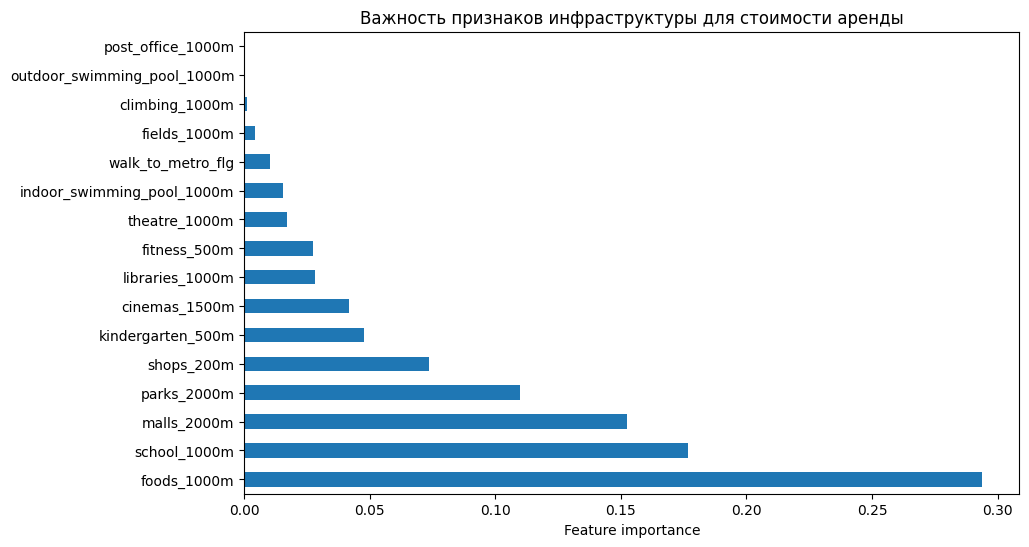

In [ ]:
model = RandomForestRegressor()
model.fit(df[infra_columns], df['r_per_meter'])

importances = pd.Series(model.feature_importances_, index=infra_columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков инфраструктуры для стоимости аренды')
plt.xlabel('Feature importance')
plt.show()


##**1. Проанализируем совокупное количество объектов инфраструктуры**

***Для каждой квартиры рассчитаем сумму всех доступных элементов окружающей среды (количество детских садов, школ, парков и др.), чтобы оценить влияние общей инфраструктурной насыщенности.***

*1.1 Гипотеза для всего города*

In [ ]:
df['infra_sum'] = df[infra_columns].sum(axis=1) # Сумма объектов инфраструктуры

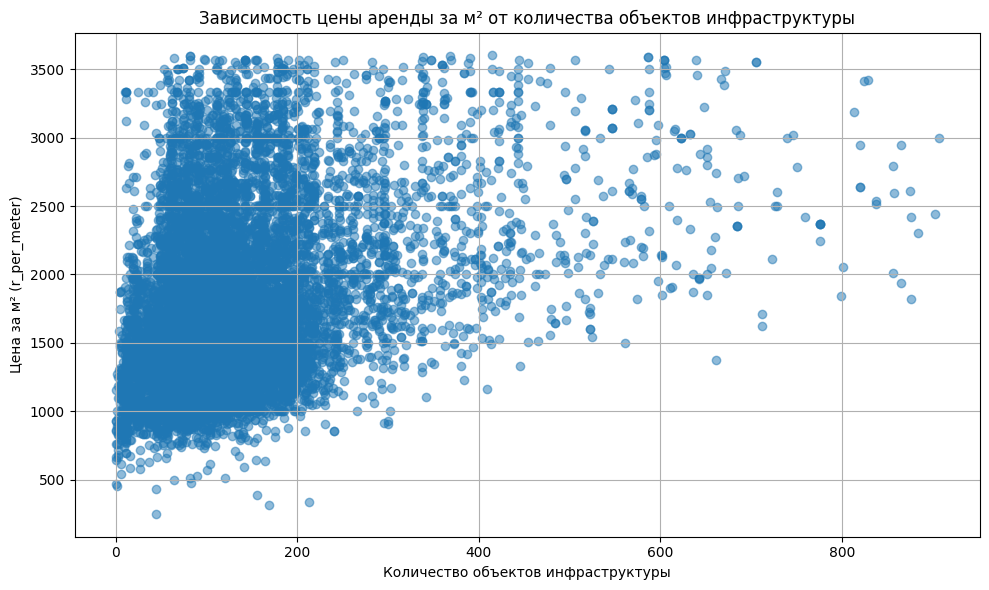

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['infra_sum'], df['r_per_meter'], alpha=0.5)
plt.xlabel('Количество объектов инфраструктуры')
plt.ylabel('Цена за м² (r_per_meter)')
plt.title('Зависимость цены аренды за м² от количества объектов инфраструктуры')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
infra_mean = df['infra_sum'].mean()
df['infra_group'] = df['infra_sum'] > infra_mean

In [ ]:
# Глобальная проверка
group_high = df[df['infra_group']]['r_per_meter']
group_low = df[~df['infra_group']]['r_per_meter']

stat, pval = ttest_ind(group_high, group_low, equal_var=False)  # Welch t-test

print(f"Глобально: p-value = {pval:.4f}")
if pval < 0.05:
    print("Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре")
else:
    print("Не отвергаем H₀: Разницы не выявлено")

Глобально: p-value = 0.0000
Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре


*1.2 Гипотеза для каждого района города*

In [ ]:
infra_mean_district = df.groupby('district_name')['infra_sum'].transform('mean')
df['infra_group_district'] = df['infra_sum'] > infra_mean_district

In [ ]:
district_results = []

for district in df['district_name'].unique():
    df_district = df[df['district_name'] == district]

    high = df_district[df_district['infra_group_district']]['r_per_meter']
    low = df_district[~df_district['infra_group_district']]['r_per_meter']

    if len(high) > 5 and len(low) > 5:  # минимальный размер выборки
        stat, p = ttest_ind(high, low, equal_var=False)
        result = 'Разница есть' if p < 0.05 else 'Разницы нет'
        district_results.append((district, p, result))

# Вывод
result_df = pd.DataFrame(district_results, columns=['Район', 'p-value', 'Гипотеза'])
print(result_df.sort_values('p-value'))

                                      Район       p-value      Гипотеза
3              Южный административный округ  1.249191e-40  Разница есть
8           Северный административный округ  3.641950e-34  Разница есть
5   Северо-Восточный административный округ  4.093133e-17  Разница есть
4       Юго-Западный административный округ  3.930093e-10  Разница есть
7        Центральный административный округ  4.994866e-09  Разница есть
6           Западный административный округ  4.595127e-05  Разница есть
1           Троицкий административный округ  2.477998e-04  Разница есть
0          Восточный административный округ  5.105993e-04  Разница есть
10   Северо-Западный административный округ  4.493081e-03  Разница есть
11    Зеленоградский административный округ  1.293487e-02  Разница есть
2      Юго-Восточный административный округ  1.871107e-01   Разницы нет
9     Новомосковский административный округ  2.174319e-01   Разницы нет


###**Вывод:**

Практически во всех районах наблюдается зависимость цены от количества объектов инфрастуктуры. Только в Юго-Восточном и Новомосковском административном округе такой зависимости не наблюдается. Интересно, что это облать территории Москвы, расположенная на юго-востоке и физически до недавнего времени относилась к Московской области.

##**2. Для каждого типа инфраструктуры будем учитывать только факт её наличия**

***Независимо от количества объектов (например, наличие хотя бы одного детского сада засчитывается как 1). На основе суммы таких наличий проанализируем влияние инфраструктуры на стоимость жилья.***

In [ ]:
df[infra_columns] = df[infra_columns].astype(bool).astype(int) # Преобразуем наличие объектов в bool

*2.1 Гипотеза для всего города*

In [ ]:
df['infra_bool_sum'] = df[infra_columns].sum(axis=1)
infra_bool_mean = df['infra_bool_sum'].mean()
df['infra_bool_group'] = df['infra_bool_sum'] > infra_bool_mean

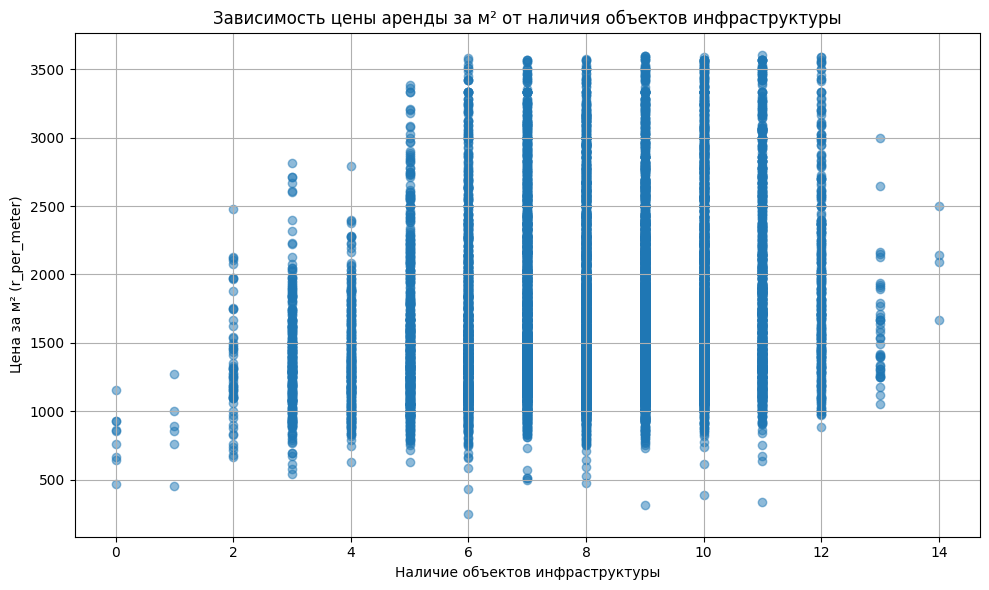

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['infra_bool_sum'], df['r_per_meter'], alpha=0.5)
plt.xlabel('Наличие объектов инфраструктуры')
plt.ylabel('Цена за м² (r_per_meter)')
plt.title('Зависимость цены аренды за м² от наличия объектов инфраструктуры')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Глобальная проверка
group_high = df[df['infra_bool_group']]['r_per_meter']
group_low = df[~df['infra_bool_group']]['r_per_meter']

stat, pval = ttest_ind(group_high, group_low, equal_var=False)  # Welch t-test

print(f"Глобально: p-value = {pval:.4f}")
if pval < 0.05:
    print("Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре")
else:
    print("Не отвергаем H₀: Разницы не выявлено")

Глобально: p-value = 0.0000
Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре


*2.2 Гипотеза для каждого района города*

In [ ]:
infra_bool_mean_district = df.groupby('district_name')['infra_bool_sum'].transform('mean')
df['infra_bool_group_district'] = df['infra_bool_sum'] > infra_bool_mean_district

In [ ]:
district_results = []

for district in df['district_name'].unique():
    df_district = df[df['district_name'] == district]

    high = df_district[df_district['infra_bool_group_district']]['r_per_meter']
    low = df_district[~df_district['infra_bool_group_district']]['r_per_meter']

    if len(high) > 5 and len(low) > 5:  # минимальный размер выборки
        stat, p = ttest_ind(high, low, equal_var=False)
        result = 'Разница есть' if p < 0.05 else 'Разницы нет'
        district_results.append((district, p, result))

# Вывод
result_df = pd.DataFrame(district_results, columns=['Район', 'p-value', 'Гипотеза'])
print(result_df.sort_values('p-value'))

                                      Район       p-value      Гипотеза
10   Северо-Западный административный округ  2.123099e-11  Разница есть
4       Юго-Западный административный округ  1.213861e-07  Разница есть
2      Юго-Восточный административный округ  4.524211e-04  Разница есть
6           Западный административный округ  8.194326e-04  Разница есть
9     Новомосковский административный округ  6.445428e-03  Разница есть
11    Зеленоградский административный округ  8.118779e-03  Разница есть
0          Восточный административный округ  2.030284e-02  Разница есть
8           Северный административный округ  2.555709e-02  Разница есть
1           Троицкий административный округ  4.837347e-02  Разница есть
7        Центральный административный округ  1.276315e-01   Разницы нет
5   Северо-Восточный административный округ  1.852115e-01   Разницы нет
3              Южный административный округ  3.020410e-01   Разницы нет


In [ ]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

data = {
    'Район': [
        'Северо-Западный административный округ',
        'Юго-Западный административный округ',
        'Юго-Восточный административный округ',
        'Западный административный округ',
        'Новомосковский административный округ',
        'Зеленоградский административный округ',
        'Восточный административный округ',
        'Северный административный округ',
        'Троицкий административный округ',
        'Центральный административный округ',
        'Северо-Восточный административный округ',
        'Южный административный округ'
    ],
    'p-value': [
        2.123099e-11,
        1.213861e-07,
        4.524211e-04,
        8.194326e-04,
        6.445428e-03,
        8.118779e-03,
        2.030284e-02,
        2.555709e-02,
        4.837347e-02,
        1.276315e-01,
        1.852115e-01,
        3.020410e-01
    ]
}

df_p_value = pd.DataFrame(data)

In [ ]:
from statsmodels.stats.multitest import multipletests

pvals = df_p_value['p-value'].values
_, pvals_corrected, _, _ = multipletests(pvals, method='bonferroni')  # или 'fdr_bh'

df_p_value['p_corrected'] = pvals_corrected
df_p_value['Гипотеза_скоррект'] = df_p_value['p_corrected'] < 0.05

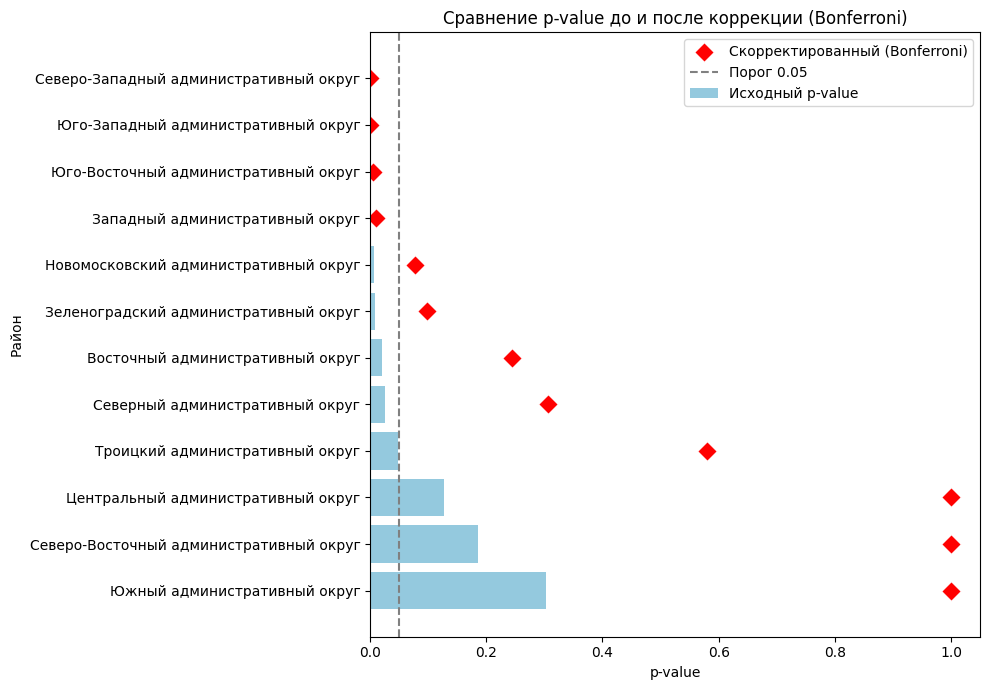

In [ ]:
# Сортировка по p-value (для удобства на графике)
df_sorted = df_p_value.sort_values('p-value')

plt.figure(figsize=(10, 7))

# Столбики для обычных p-value
sns.barplot(
    y='Район',
    x='p-value',
    data=df_sorted,
    color='skyblue',
    label='Исходный p-value'
)

# Столбики поверх — скорректированные p-value
sns.scatterplot(
    y='Район',
    x='p_corrected',
    data=df_sorted,
    color='red',
    label='Скорректированный (Bonferroni)',
    marker='D',
    s=100
)

# Порог значимости
plt.axvline(0.05, color='gray', linestyle='--', label='Порог 0.05')

plt.title('Сравнение p-value до и после коррекции (Bonferroni)')
plt.xlabel('p-value')
plt.ylabel('Район')
plt.legend()
plt.tight_layout()
plt.show()

###**Вывод:**

Влияние наличия инфраструктуры на стоимость аренды действительно наблюдается в ряде округов, но после строгой коррекции на множественные сравнения статистически значимыми остаются только наиболее уверенные различия.

# **Гипотеза H₀.2**

 H0: Стоимость аренды НЕ зависит от количества удобств или от наличия конкретных добств

 H2: Стоимость аренды зависит от количества удобств или от наличия конкретных добств

In [ ]:
# Создание нового столбца "total_conveniences" - общее количество удобств
convenience_columns = [
    'Холодильник', 'Посудомоечная машина', 'Стиральная машина', 'Кондиционер',
    'Телевизор', 'Интернет', 'Мебель на кухне', 'Мебель в комнатах'
]
df['total_conveniences'] = df[convenience_columns].sum(axis=1)

# Гипотеза 1: Зависимость цены за квадратный метр от общего количества удобств
price_per_meter = df['r_per_meter']
total_conveniences = df['total_conveniences']

# Корреляция Пирсона
pearson_corr, pearson_p_value = pearsonr(total_conveniences, price_per_meter)
print(f"Корреляция Пирсона: r = {pearson_corr:.3f}, p-value = {pearson_p_value:.3f}")

# Корреляция Спирмена
spearman_corr, spearman_p_value = spearmanr(total_conveniences, price_per_meter)
print(f"Корреляция Спирмена: rho = {spearman_corr:.3f}, p-value = {spearman_p_value:.3f}")

# Вывод по Гипотезе 1
if pearson_p_value < 0.05 or spearman_p_value < 0.05:
    print("Гипотеза 1 подтверждена: существует зависимость цены за квадратный метр от общего количества удобств.")
else:
    print("Гипотеза 1 не подтверждена: нет значимой зависимости.")

# Гипотеза 2: Зависимость цены за квадратный метр от наличия конкретных удобств
for convenience in convenience_columns:
    group_with = price_per_meter[df[convenience] == 1]
    group_without = price_per_meter[df[convenience] == 0]

    # t-тест для сравнения средних значений
    t_stat, p_value = ttest_ind(group_with, group_without, equal_var=False)
    print(f"\n{convenience}: t-stat = {t_stat:.3f}, p-value = {p_value:.3f}")

    if p_value < 0.05:
        print(f"Гипотеза 2 для '{convenience}' подтверждена: есть зависимость.")
    else:
        print(f"Гипотеза 2 для '{convenience}' не подтверждена: нет значимой зависимости.")

# Дополнительно: Тест Хи-квадрат для категориальных данных
# Пример: Наличие холодильника и высокая/низкая цена за квадратный метр
median_price = df['r_per_meter'].median()
df['high_price'] = (df['r_per_meter'] > median_price).astype(int)

contingency_table = pd.crosstab(df['Холодильник'], df['high_price'])
chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nТест Хи-квадрат для 'Холодильник': chi2 = {chi2:.3f}, p-value = {chi2_p_value:.3f}")

if chi2_p_value < 0.05:
    print("Зависимость между наличием холодильника и уровнем цены подтверждена.")
else:
    print("Зависимость между наличием холодильника и уровнем цены не подтверждена.")

Корреляция Пирсона: r = 0.252, p-value = 0.000
Корреляция Спирмена: rho = 0.284, p-value = 0.000
Гипотеза 1 подтверждена: существует зависимость цены за квадратный метр от общего количества удобств.

Холодильник: t-stat = -4.872, p-value = 0.000
Гипотеза 2 для 'Холодильник' подтверждена: есть зависимость.

Посудомоечная машина: t-stat = 46.315, p-value = 0.000
Гипотеза 2 для 'Посудомоечная машина' подтверждена: есть зависимость.

Стиральная машина: t-stat = 4.555, p-value = 0.000
Гипотеза 2 для 'Стиральная машина' подтверждена: есть зависимость.

Кондиционер: t-stat = 45.272, p-value = 0.000
Гипотеза 2 для 'Кондиционер' подтверждена: есть зависимость.

Телевизор: t-stat = 12.336, p-value = 0.000
Гипотеза 2 для 'Телевизор' подтверждена: есть зависимость.

Интернет: t-stat = 10.661, p-value = 0.000
Гипотеза 2 для 'Интернет' подтверждена: есть зависимость.

Мебель на кухне: t-stat = -11.178, p-value = 0.000
Гипотеза 2 для 'Мебель на кухне' подтверждена: есть зависимость.

Мебель в комната

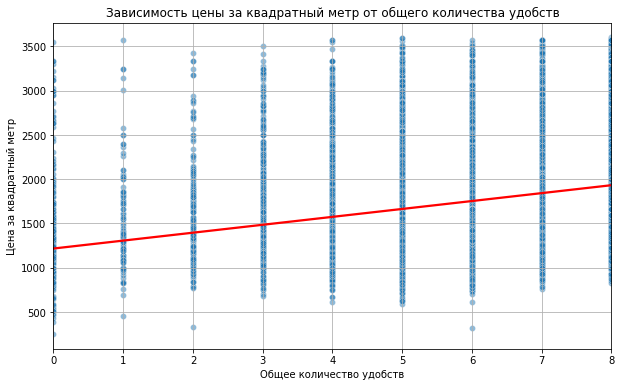

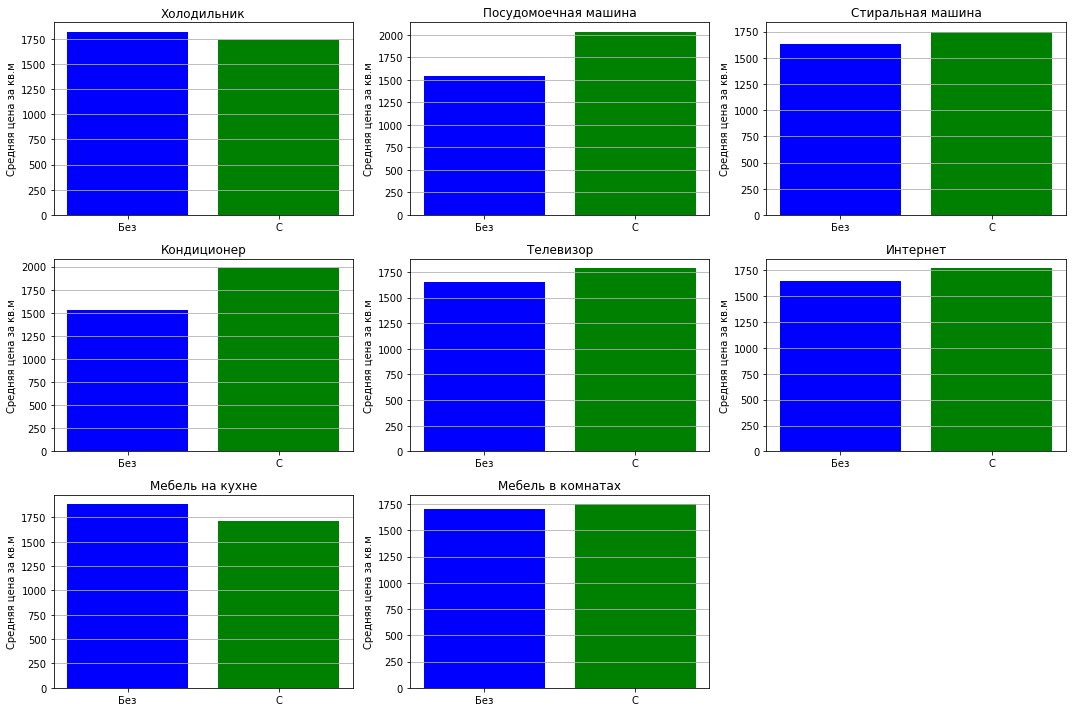

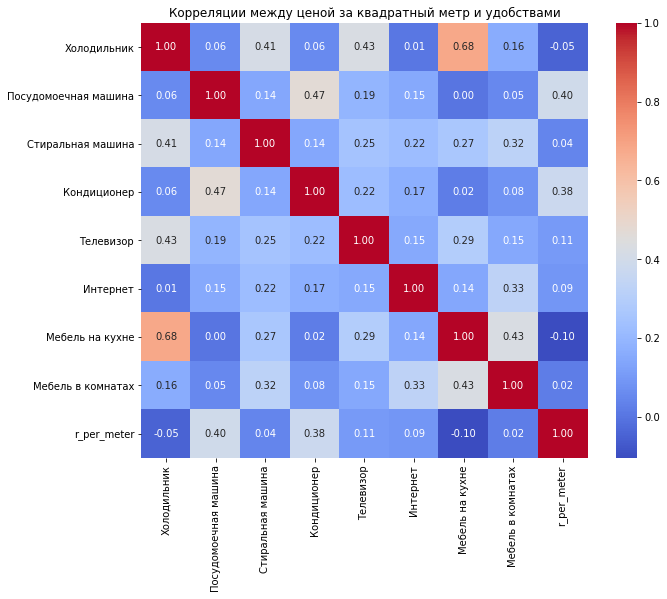

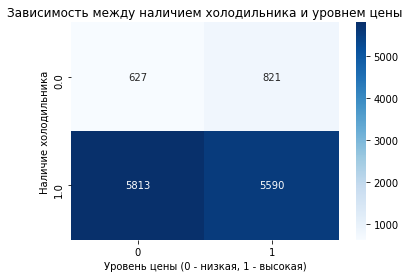

In [ ]:
# Создание нового столбца "total_conveniences" - общее количество удобств
convenience_columns = [
    'Холодильник', 'Посудомоечная машина', 'Стиральная машина', 'Кондиционер',
    'Телевизор', 'Интернет', 'Мебель на кухне', 'Мебель в комнатах'
]
df['total_conveniences'] = df[convenience_columns].sum(axis=1)

# Основные переменные
price_per_meter = df['r_per_meter']
total_conveniences = df['total_conveniences']

# 1. График зависимости цены за квадратный метр от общего количества удобств
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_conveniences, y=price_per_meter, alpha=0.5)
sns.regplot(x=total_conveniences, y=price_per_meter, scatter=False, color='red', ci=None)
plt.title('Зависимость цены за квадратный метр от общего количества удобств')
plt.xlabel('Общее количество удобств')
plt.ylabel('Цена за квадратный метр')
plt.grid()
plt.show()

# 2. Гистограммы средней цены за квадратный метр для наличия/отсутствия конкретных удобств
plt.figure(figsize=(15, 10))
for i, convenience in enumerate(convenience_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 сетка для 8 удобств
    group_with = price_per_meter[df[convenience] == 1]
    group_without = price_per_meter[df[convenience] == 0]

    # Построение гистограмм
    plt.bar(['Без', 'С'], [group_without.mean(), group_with.mean()], color=['blue', 'green'])
    plt.title(f'{convenience}')
    plt.ylabel('Средняя цена за кв.м')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# 3. Тепловая карта корреляций между ценой за квадратный метр и удобствами
correlation_matrix = df[convenience_columns + ['r_per_meter']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляции между ценой за квадратный метр и удобствами')
plt.show()

# 4. Тест Хи-квадрат: Визуализация зависимости наличия холодильника и уровня цены
median_price = df['r_per_meter'].median()
df['high_price'] = (df['r_per_meter'] > median_price).astype(int)

contingency_table = pd.crosstab(df['Холодильник'], df['high_price'])

plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Зависимость между наличием холодильника и уровнем цены')
plt.xlabel('Уровень цены (0 - низкая, 1 - высокая)')
plt.ylabel('Наличие холодильника')
plt.show()

In [ ]:
# Основные переменные
price_per_meter = df['r_per_meter']  # Цена за квадратный метр
total_area = df['m_sqarea']          # Общая площадь
kitchen_area = df['Площадь кухни']   # Площадь кухни
num_bathrooms = df['сумма_санузлов'] # Количество санузлов
shared_bathroom = df['совмещенный']  # Совмещенный санузел
num_balconies = df['сумма_балконов'] # Количество балконов
has_balcony = df['балкон']           # Наличие балкона

# 1. Зависимость цены за квадратный метр от общей площади
pearson_corr_total, pearson_p_value_total = pearsonr(total_area, price_per_meter)
spearman_corr_total, spearman_p_value_total = spearmanr(total_area, price_per_meter)

print(f"Зависимость от общей площади:")
print(f"Корреляция Пирсона: r = {pearson_corr_total:.3f}, p-value = {pearson_p_value_total:.3f}")
print(f"Корреляция Спирмена: rho = {spearman_corr_total:.3f}, p-value = {spearman_p_value_total:.3f}")

# 2. Зависимость цены за квадратный метр от площади кухни
pearson_corr_kitchen, pearson_p_value_kitchen = pearsonr(kitchen_area, price_per_meter)
spearman_corr_kitchen, spearman_p_value_kitchen = spearmanr(kitchen_area, price_per_meter)

print(f"\nЗависимость от площади кухни:")
print(f"Корреляция Пирсона: r = {pearson_corr_kitchen:.3f}, p-value = {pearson_p_value_kitchen:.3f}")
print(f"Корреляция Спирмена: rho = {spearman_corr_kitchen:.3f}, p-value = {spearman_p_value_kitchen:.3f}")

# 3. Зависимость цены за квадратный метр от количества санузлов
pearson_corr_bathrooms, pearson_p_value_bathrooms = pearsonr(num_bathrooms, price_per_meter)
spearman_corr_bathrooms, spearman_p_value_bathrooms = spearmanr(num_bathrooms, price_per_meter)

print(f"\nЗависимость от количества санузлов:")
print(f"Корреляция Пирсона: r = {pearson_corr_bathrooms:.3f}, p-value = {pearson_p_value_bathrooms:.3f}")
print(f"Корреляция Спирмена: rho = {spearman_corr_bathrooms:.3f}, p-value = {spearman_p_value_bathrooms:.3f}")

# 4. Зависимость цены за квадратный метр от наличия совмещенного санузла
group_shared = price_per_meter[shared_bathroom]
group_not_shared = price_per_meter[~shared_bathroom]

t_stat_shared, p_value_shared = ttest_ind(group_shared, group_not_shared, equal_var=False)
print(f"\nЗависимость от наличия совмещенного санузла:")
print(f"t-stat = {t_stat_shared:.3f}, p-value = {p_value_shared:.3f}")

if p_value_shared < 0.05:
    print("Гипотеза подтверждена: цена зависит от наличия совмещенного санузла.")
else:
    print("Гипотеза не подтверждена: цена не зависит от наличия совмещенного санузла.")

# 5. Зависимость цены за квадратный метр от количества балконов
pearson_corr_balconies, pearson_p_value_balconies = pearsonr(num_balconies, price_per_meter)
spearman_corr_balconies, spearman_p_value_balconies = spearmanr(num_balconies, price_per_meter)

print(f"\nЗависимость от количества балконов:")
print(f"Корреляция Пирсона: r = {pearson_corr_balconies:.3f}, p-value = {pearson_p_value_balconies:.3f}")
print(f"Корреляция Спирмена: rho = {spearman_corr_balconies:.3f}, p-value = {spearman_p_value_balconies:.3f}")

# 6. Зависимость цены за квадратный метр от наличия балкона
group_with_balcony = price_per_meter[has_balcony]
group_without_balcony = price_per_meter[~has_balcony]

t_stat_balcony, p_value_balcony = ttest_ind(group_with_balcony, group_without_balcony, equal_var=False)
print(f"\nЗависимость от наличия балкона:")
print(f"t-stat = {t_stat_balcony:.3f}, p-value = {p_value_balcony:.3f}")

if p_value_balcony < 0.05:
    print("Гипотеза подтверждена: цена зависит от наличия балкона")
else:
    print("Гипотеза не подтверждена: цена не зависит от наличия балкона.")

Зависимость от общей площади:
Корреляция Пирсона: r = -0.153, p-value = 0.000
Корреляция Спирмена: rho = -0.210, p-value = 0.000

Зависимость от площади кухни:
Корреляция Пирсона: r = 0.053, p-value = 0.000
Корреляция Спирмена: rho = 0.017, p-value = 0.055

Зависимость от количества санузлов:
Корреляция Пирсона: r = 0.093, p-value = 0.000
Корреляция Спирмена: rho = 0.075, p-value = 0.000

Зависимость от наличия совмещенного санузла:
t-stat = 43.598, p-value = 0.000
Гипотеза подтверждена: цена зависит от наличия совмещенного санузла.

Зависимость от количества балконов:
Корреляция Пирсона: r = -0.328, p-value = 0.000
Корреляция Спирмена: rho = -0.330, p-value = 0.000

Зависимость от наличия балкона:
t-stat = -38.093, p-value = 0.000
Гипотеза подтверждена: цена зависит от наличия балкона


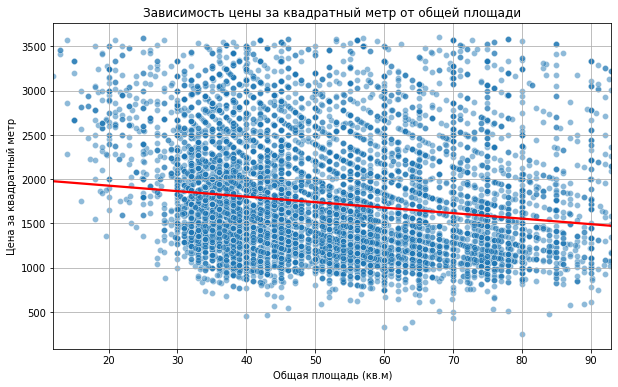

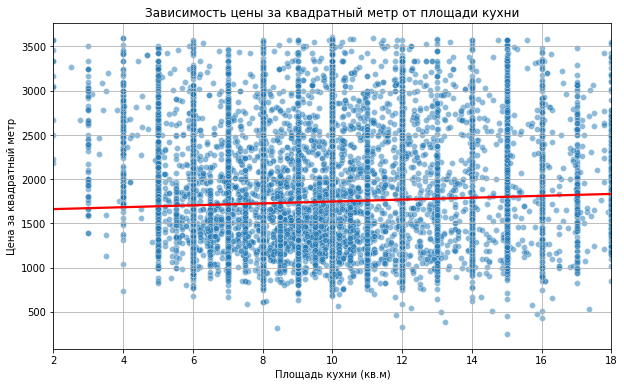

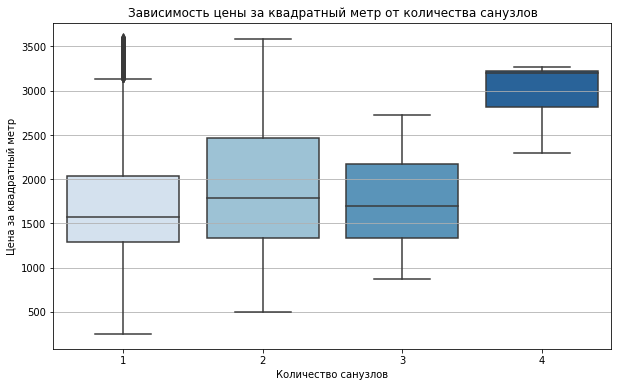

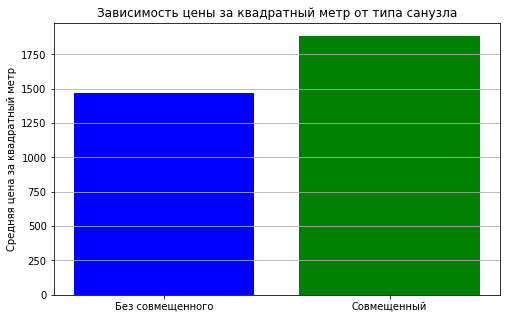

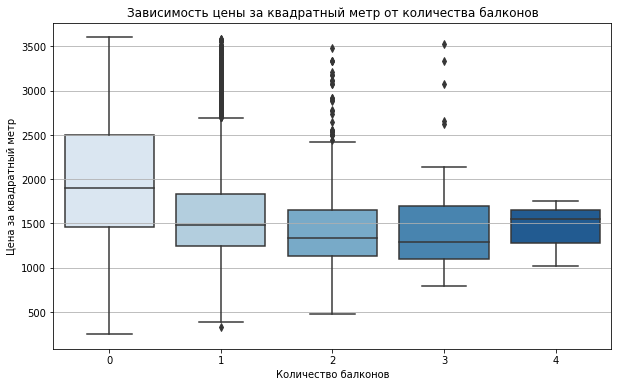

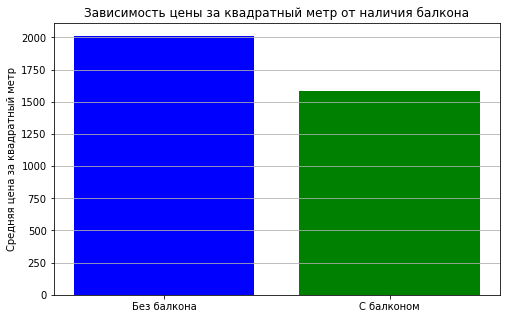

In [ ]:
# Основные переменные
price_per_meter = df['r_per_meter']  # Цена за квадратный метр
total_area = df['m_sqarea']          # Общая площадь
kitchen_area = df['Площадь кухни']   # Площадь кухни
num_bathrooms = df['сумма_санузлов'] # Количество санузлов
shared_bathroom = df['совмещенный']  # Совмещенный санузел
num_balconies = df['сумма_балконов'] # Количество балконов
has_balcony = df['балкон']           # Наличие балкона

# 1. График зависимости цены за квадратный метр от общей площади
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_area, y=price_per_meter, alpha=0.5)
sns.regplot(x=total_area, y=price_per_meter, scatter=False, color='red', ci=None)
plt.title('Зависимость цены за квадратный метр от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Цена за квадратный метр')
plt.grid()
plt.show()

# 2. График зависимости цены за квадратный метр от площади кухни
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kitchen_area, y=price_per_meter, alpha=0.5)
sns.regplot(x=kitchen_area, y=price_per_meter, scatter=False, color='red', ci=None)
plt.title('Зависимость цены за квадратный метр от площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Цена за квадратный метр')
plt.grid()
plt.show()

# 3. График зависимости цены за квадратный метр от количества санузлов
plt.figure(figsize=(10, 6))
sns.boxplot(x=num_bathrooms, y=price_per_meter, palette='Blues')
plt.title('Зависимость цены за квадратный метр от количества санузлов')
plt.xlabel('Количество санузлов')
plt.ylabel('Цена за квадратный метр')
plt.grid(axis='y')
plt.show()

# 4. Гистограммы средней цены за квадратный метр для совмещенных/раздельных санузлов
plt.figure(figsize=(8, 5))
group_shared = price_per_meter[shared_bathroom]
group_not_shared = price_per_meter[~shared_bathroom]

plt.bar(['Без совмещенного', 'Совмещенный'], [group_not_shared.mean(), group_shared.mean()], color=['blue', 'green'])
plt.title('Зависимость цены за квадратный метр от типа санузла')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(axis='y')
plt.show()

# 5. График зависимости цены за квадратный метр от количества балконов
plt.figure(figsize=(10, 6))
sns.boxplot(x=num_balconies, y=price_per_meter, palette='Blues')
plt.title('Зависимость цены за квадратный метр от количества балконов')
plt.xlabel('Количество балконов')
plt.ylabel('Цена за квадратный метр')
plt.grid(axis='y')
plt.show()

# 6. Гистограммы средней цены за квадратный метр для квартир с балконом и без балкона
plt.figure(figsize=(8, 5))
group_with_balcony = price_per_meter[has_balcony]
group_without_balcony = price_per_meter[~has_balcony]

plt.bar(['Без балкона', 'С балконом'], [group_without_balcony.mean(), group_with_balcony.mean()], color=['blue', 'green'])
plt.title('Зависимость цены за квадратный метр от наличия балкона')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(axis='y')
plt.show()


Зависимость цены за квадратный метр от совмещенности санузла (при количестве санузлов = 1):
t-stat = 43.606, p-value = 0.000
Гипотеза подтверждена: цена зависит от совмещенности санузла.


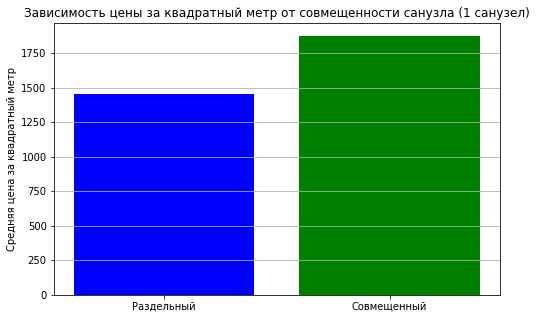

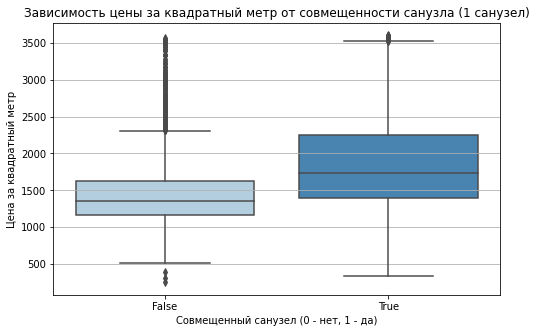

In [ ]:
# Фильтрация данных: только квартиры с одним санузлом
df_one_bathroom = df[df['сумма_санузлов'] == 1]

# Основные переменные
price_per_meter = df_one_bathroom['r_per_meter']  # Цена за квадратный метр
shared_bathroom = df_one_bathroom['совмещенный']  # Совмещенный санузел

# Разделение данных на группы
group_shared = price_per_meter[shared_bathroom]
group_not_shared = price_per_meter[~shared_bathroom]

# t-тест для сравнения средних значений
t_stat_shared, p_value_shared = ttest_ind(group_shared, group_not_shared, equal_var=False)
print(f"\nЗависимость цены за квадратный метр от совмещенности санузла (при количестве санузлов = 1):")
print(f"t-stat = {t_stat_shared:.3f}, p-value = {p_value_shared:.3f}")

if p_value_shared < 0.05:
    print("Гипотеза подтверждена: цена зависит от совмещенности санузла.")
else:
    print("Гипотеза не подтверждена: цена не зависит от совмещенности санузла.")

# Визуализация: Гистограммы средней цены за квадратный метр
plt.figure(figsize=(8, 5))
plt.bar(['Раздельный', 'Совмещенный'], [group_not_shared.mean(), group_shared.mean()], color=['blue', 'green'])
plt.title('Зависимость цены за квадратный метр от совмещенности санузла (1 санузел)')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(axis='y')
plt.show()

# Визуализация: Ящиковые диаграммы
plt.figure(figsize=(8, 5))
sns.boxplot(x=shared_bathroom, y=price_per_meter, palette='Blues')
plt.title('Зависимость цены за квадратный метр от совмещенности санузла (1 санузел)')
plt.xlabel('Совмещенный санузел (0 - нет, 1 - да)')
plt.ylabel('Цена за квадратный метр')
plt.grid(axis='y')
plt.show()

Корреляции совмещенности санузла с другими признаками:
Год постройки: r = 0.161
Общая площадь: r = -0.362
Цена за квадратный метр: r = 0.338

Средние значения для совмещенного и раздельного санузла:
             Год постройки (среднее)  Общая площадь (среднее)  \
Раздельный               1987.396568                54.804297   
Совмещенный              1995.971202                44.160592   

             Цена за квадратный метр (среднее)  
Раздельный                         1452.349928  
Совмещенный                        1875.634972  


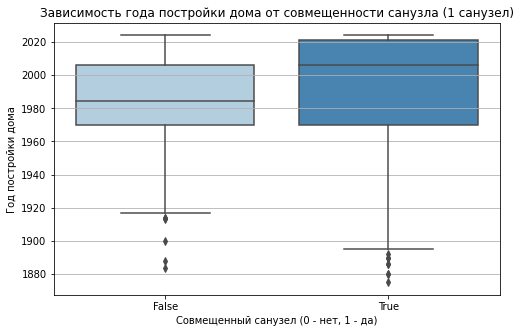

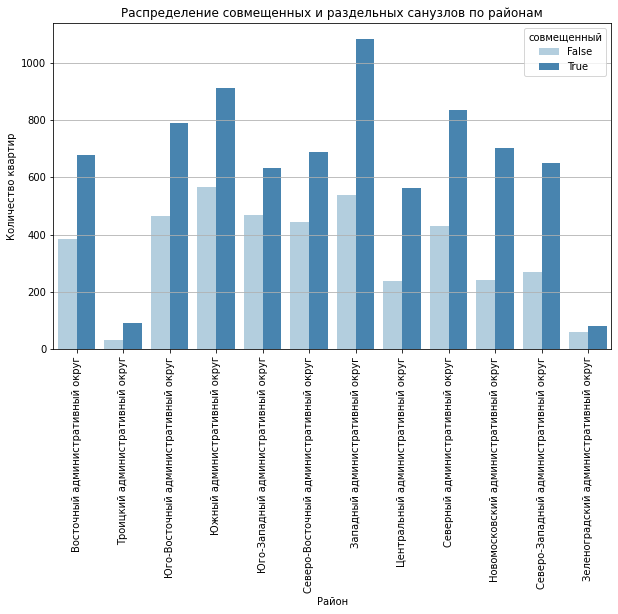

In [ ]:
# Фильтрация данных: только квартиры с одним санузлом
df_one_bathroom = df[df['сумма_санузлов'] == 1]

# Основные переменные
shared_bathroom = df_one_bathroom['совмещенный']  # Совмещенный санузел
year_of_construction = df_one_bathroom['Год постройки']  # Год постройки дома
district_name = df_one_bathroom['district_name']  # Район
total_area = df_one_bathroom['m_sqarea']  # Общая площадь
price_per_meter = df_one_bathroom['r_per_meter']  # Цена за квадратный метр

# 1. Корреляция совмещенности санузла с другими числовыми признаками
correlation_with_shared = {
    'Год постройки': pearsonr(shared_bathroom, year_of_construction)[0],
    'Общая площадь': pearsonr(shared_bathroom, total_area)[0],
    'Цена за квадратный метр': pearsonr(shared_bathroom, price_per_meter)[0]
}
print("Корреляции совмещенности санузла с другими признаками:")
for feature, corr in correlation_with_shared.items():
    print(f"{feature}: r = {corr:.3f}")

# 2. Сравнение средних значений для совмещенного и раздельного санузла
group_shared = df_one_bathroom[shared_bathroom]
group_not_shared = df_one_bathroom[~shared_bathroom]

mean_values = {
    'Год постройки (среднее)': [group_not_shared['Год постройки'].mean(), group_shared['Год постройки'].mean()],
    'Общая площадь (среднее)': [group_not_shared['m_sqarea'].mean(), group_shared['m_sqarea'].mean()],
    'Цена за квадратный метр (среднее)': [group_not_shared['r_per_meter'].mean(), group_shared['r_per_meter'].mean()]
}

mean_values_df = pd.DataFrame(mean_values, index=['Раздельный', 'Совмещенный'])
print("\nСредние значения для совмещенного и раздельного санузла:")
print(mean_values_df)

# 3. Визуализация: Год постройки дома
plt.figure(figsize=(8, 5))
sns.boxplot(x=shared_bathroom, y=year_of_construction, palette='Blues')
plt.title('Зависимость года постройки дома от совмещенности санузла (1 санузел)')
plt.xlabel('Совмещенный санузел (0 - нет, 1 - да)')
plt.ylabel('Год постройки дома')
plt.grid(axis='y')
plt.show()

# 4. Визуализация: Распределение по районам
plt.figure(figsize=(10, 6))
sns.countplot(x=district_name, hue=shared_bathroom, palette='Blues')
plt.title('Распределение совмещенных и раздельных санузлов по районам')
plt.xlabel('Район')
plt.ylabel('Количество квартир')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### **Вывод**

Нулевая гипотеза отвергается по всем рассмотренным удобствам.

Существует зависимость цены за квадратный метр от общего количества удобств. Также, наличие каждого удобства в отдельности влияет на цену, а именно наличие холодильника, посудомоечной машины, стиральной машины, кондиционера, телевизора, интернета, мебели на кухне, мебели в комнатах, наличие балкона и их количество, наличие совмещенного сан. узла и количество сан. узлов влияет на цену.

Также, в ходе исследования обнаружена зависимость наличия совмещенного сан. узла от года постройки.

# **Гипотеза H₀.3**

Н0: Количество комнат не влияет на стоимость квартиры

Н3: Цена в общем за квартиру и за кв.м зависит от комнатности

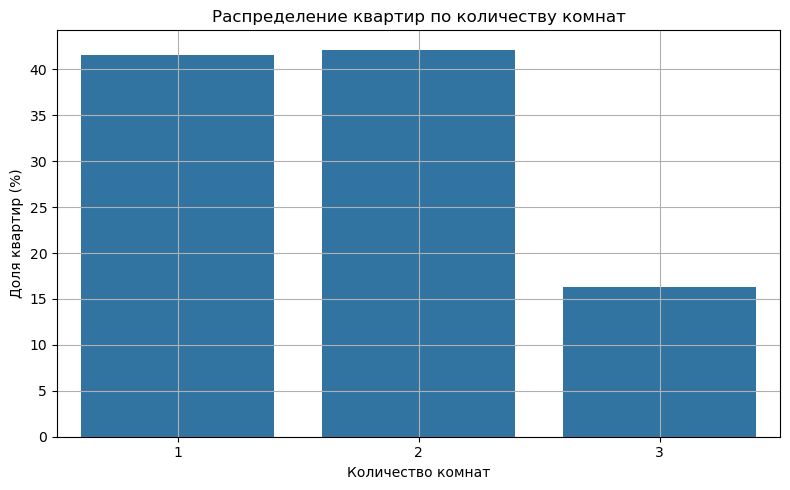

In [ ]:
# Распределение количества комнат в датасете
room_counts = df['rooms'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=room_counts.index, y=room_counts.values * 100)
plt.ylabel('Доля квартир (%)')
plt.xlabel('Количество комнат')
plt.title('Распределение квартир по количеству комнат')
plt.grid(True)
plt.tight_layout()
plt.show()

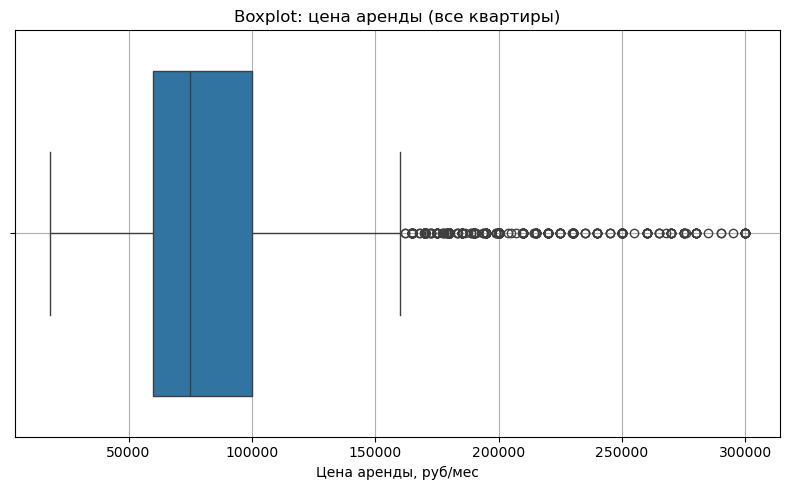

In [ ]:
# Построим boxplot для выявления выбросов по аренде комнат
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot: цена аренды (все квартиры)')
plt.xlabel('Цена аренды, руб/мес')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12851 entries, 0 to 12850
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   12851 non-null  int64  
 1   metro                        12851 non-null  object 
 2   walk_to_metro_flg            12851 non-null  bool   
 3   address                      12851 non-null  object 
 4   price                        12851 non-null  float64
 5   m_sqarea                     12851 non-null  float64
 6   floor_flat                   12851 non-null  float64
 7   floor_max                    12851 non-null  float64
 8   rooms                        12851 non-null  int64  
 9   latitude                     12851 non-null  float64
 10  longitude                    12851 non-null  float64
 11  district_name                12851 non-null  object 
 12  dist_to_center               12851 non-null  float64
 13  r_per_meter     

## Нулевая гипотеза для всего города (всех округов):

***Количество комнат не влияет на стоимость квартиры***

In [ ]:
# Вводим таргет (Y) и независимые признаки (X)
# Выбрал данные признаки, т.к. между ними появляется минимальная мультиколлинеарность
X = ['Залог',
     'rooms',
     'dist_to_center',
     'floor_max',
     'walk_to_metro_flg'
      ]

Y = ['price']

In [ ]:
df_new = df.copy()

In [ ]:
# Перевод бинарного атрибута в числовой формат
df_new['walk_to_metro_flg'] = df_new['walk_to_metro_flg'].astype(int)

In [ ]:
predictors = df_new[X]
target = df_new[Y]

In [ ]:
# Расчет VIF для выявления мультиколлинеарности
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif_data = pd.DataFrame()
vif_data['Признак'] = predictors.columns
vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data)

             Признак       VIF
0              Залог  5.702381
1              rooms  7.257591
2     dist_to_center  3.218849
3          floor_max  4.181416
4  walk_to_metro_flg  4.547167


In [ ]:
# Построение модели для дальнейшей оценки
import statsmodels.api as sm

predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     6949.
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        04:52:51   Log-Likelihood:            -1.4562e+05
No. Observations:               12851   AIC:                         2.913e+05
Df Residuals:                   12845   BIC:                         2.913e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.506e+04    917.26

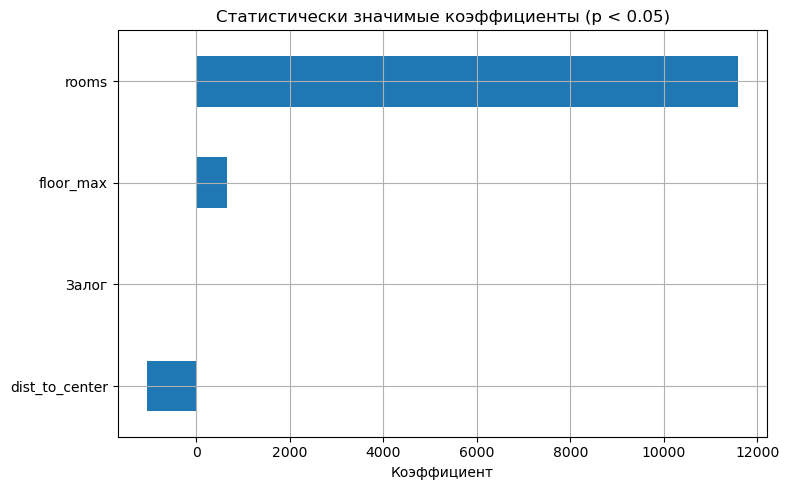

In [ ]:
# Получаем таблицу с коэффициентами и p-значениями
summary_df = model.summary2().tables[1]
significant = summary_df[summary_df['P>|t|'] < 0.05]

# Убираем константу
significant = significant.drop(index='const', errors='ignore')

# Визуализация
plt.figure(figsize=(8, 5))
significant['Coef.'].sort_values().plot(kind='barh')
plt.title('Статистически значимые коэффициенты (p < 0.05)')
plt.xlabel('Коэффициент')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Принимаем или отклоняем нулевую гипотезу (берем коэффициент alpha = 0.05)
p_rooms = model.pvalues['rooms']
alpha = 0.05

if p_rooms < alpha:
    print(f"p-value={p_rooms:.3e} < {alpha}: отвергаем H0 — зависимость есть")
else:
    print(f"p-value={p_rooms:.3e} ≥ {alpha}: не отвергаем H0 — зависимость не доказана")

p-value=0.000e+00 < 0.05: отвергаем H0 — зависимость есть


## Нулевая гипотеза для округов по отдельности

Через цикл пройдемся тем же методом по каждому округу

In [ ]:
region = list(df_new['district_name'].unique())

In [ ]:
def region_model(df_new, X, Y, reg):
  global p_set
  print('---------------------------')
  print(reg)
  predictors = df_new[X]
  target = df_new[Y]

  # Расчет VIF
  vif_data = pd.DataFrame()
  vif_data['Признак'] = predictors.columns
  vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
  print(vif_data)

  predictors = sm.add_constant(predictors)
  model = sm.OLS(target, predictors).fit()
  # print(model.summary())

  p_rooms = model.pvalues['rooms']
  alpha   = 0.05

  if p_rooms < alpha:
      print(f"p-value={p_rooms:.3e} < {alpha}: отвергаем H0 — зависимость есть")
  else:
      print(f"p-value={p_rooms:.3e} ≥ {alpha}: не отвергаем H0 — зависимость не доказана")
  p_set[reg] = p_rooms

  # Визуализация
  summary_df = model.summary2().tables[1]
  significant = summary_df[summary_df['P>|t|'] < 0.05]
  significant = significant.drop(index='const', errors='ignore')
  plt.figure(figsize=(8, 5))
  significant['Coef.'].sort_values().plot(kind='barh')
  plt.title('Статистически значимые коэффициенты (p < 0.05)')
  plt.xlabel('Коэффициент')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

---------------------------
Восточный административный округ
             Признак       VIF
0              Залог  7.403344
1              rooms  7.608352
2     dist_to_center  6.635283
3          floor_max  4.093775
4  walk_to_metro_flg  4.402209
p-value=2.452e-71 < 0.05: отвергаем H0 — зависимость есть


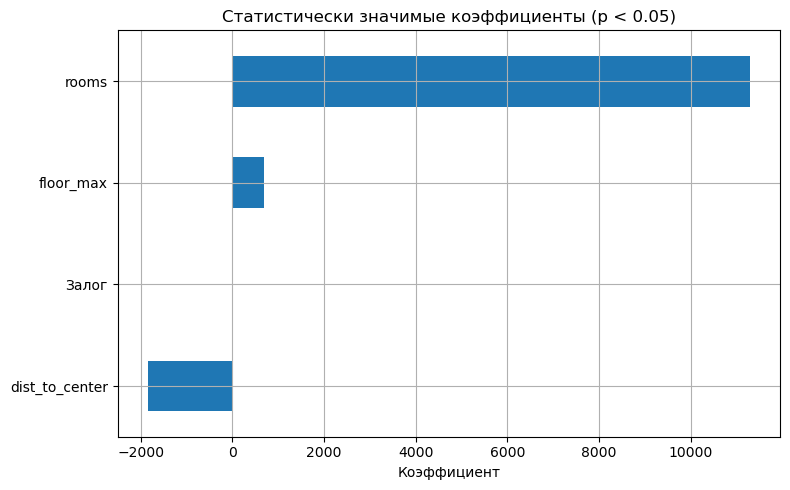

---------------------------
Троицкий административный округ
             Признак        VIF
0              Залог  10.103025
1              rooms   9.427891
2     dist_to_center   7.215988
3          floor_max   4.946037
4  walk_to_metro_flg   1.123067
p-value=6.318e-08 < 0.05: отвергаем H0 — зависимость есть


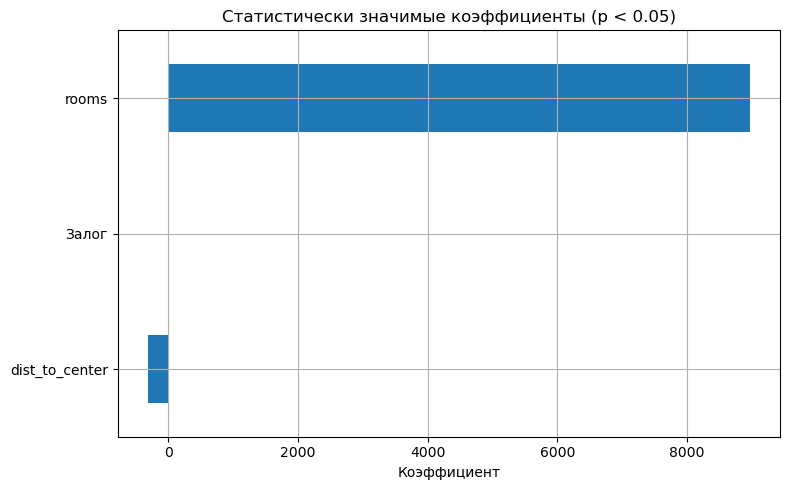

---------------------------
Юго-Восточный административный округ
             Признак       VIF
0              Залог  7.312105
1              rooms  7.167350
2     dist_to_center  4.350291
3          floor_max  5.085460
4  walk_to_metro_flg  7.718075
p-value=7.233e-97 < 0.05: отвергаем H0 — зависимость есть


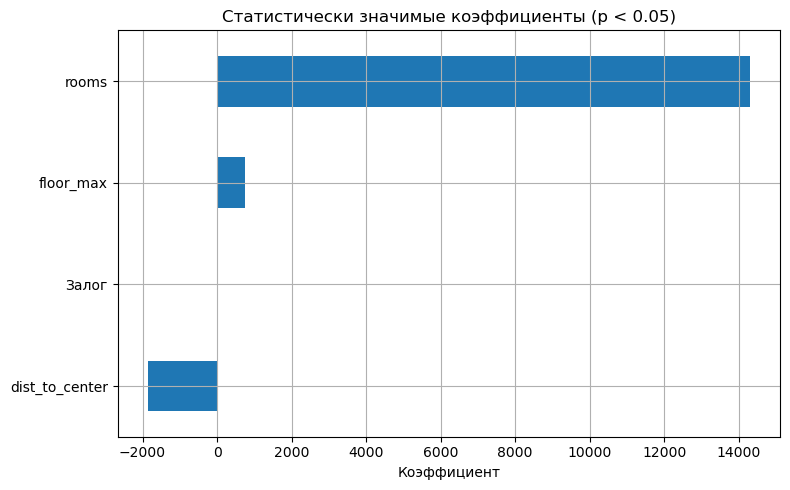

---------------------------
Южный административный округ
             Признак       VIF
0              Залог  5.952369
1              rooms  7.598787
2     dist_to_center  5.558694
3          floor_max  5.400453
4  walk_to_metro_flg  5.329298
p-value=1.289e-64 < 0.05: отвергаем H0 — зависимость есть


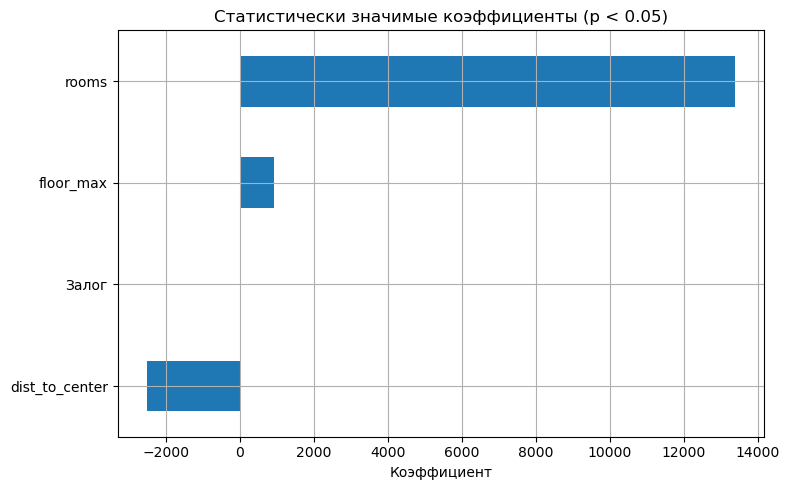

---------------------------
Юго-Западный административный округ
             Признак        VIF
0              Залог   7.013276
1              rooms   8.125672
2     dist_to_center   6.738754
3          floor_max   5.300102
4  walk_to_metro_flg  11.007062
p-value=1.915e-53 < 0.05: отвергаем H0 — зависимость есть


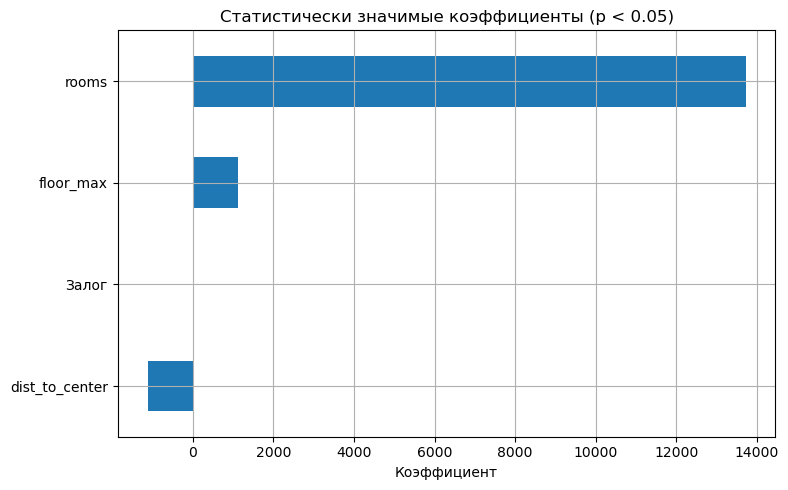

---------------------------
Северо-Восточный административный округ
             Признак       VIF
0              Залог  6.254711
1              rooms  7.360383
2     dist_to_center  4.644958
3          floor_max  4.158374
4  walk_to_metro_flg  4.302898
p-value=7.217e-42 < 0.05: отвергаем H0 — зависимость есть


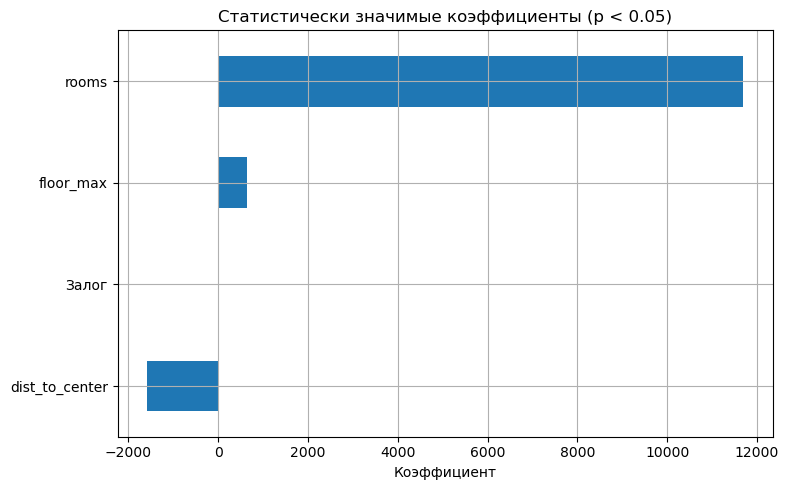

---------------------------
Западный административный округ
             Признак       VIF
0              Залог  6.214061
1              rooms  8.003950
2     dist_to_center  6.882946
3          floor_max  5.744607
4  walk_to_metro_flg  6.880624
p-value=1.523e-56 < 0.05: отвергаем H0 — зависимость есть


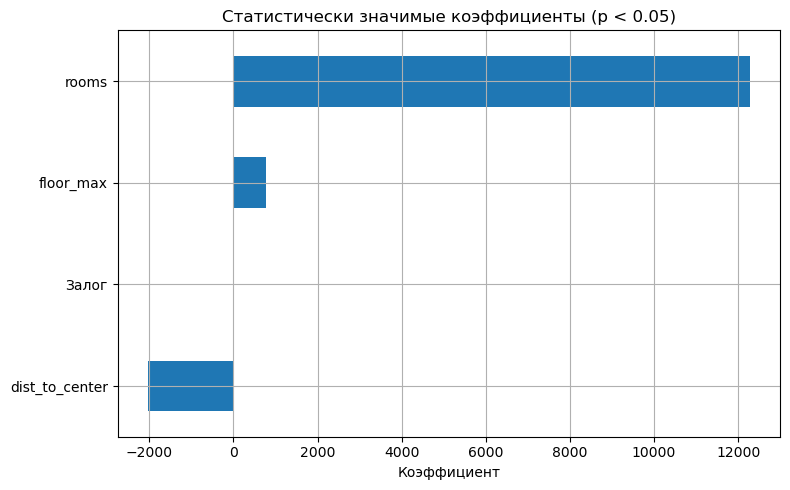

---------------------------
Центральный административный округ
             Признак        VIF
0              Залог   9.162934
1              rooms   9.548723
2     dist_to_center   7.573661
3          floor_max   3.096985
4  walk_to_metro_flg  14.553483
p-value=8.062e-13 < 0.05: отвергаем H0 — зависимость есть


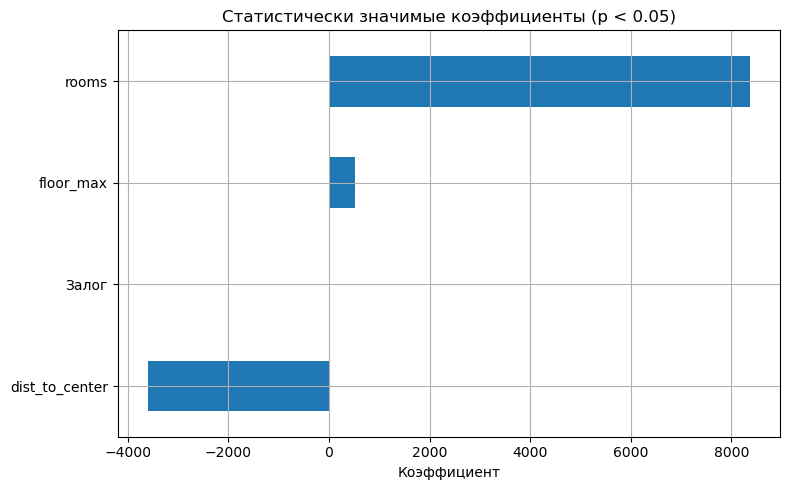

---------------------------
Северный административный округ
             Признак       VIF
0              Залог  5.569371
1              rooms  8.284142
2     dist_to_center  5.052633
3          floor_max  4.406339
4  walk_to_metro_flg  7.174470
p-value=8.580e-47 < 0.05: отвергаем H0 — зависимость есть


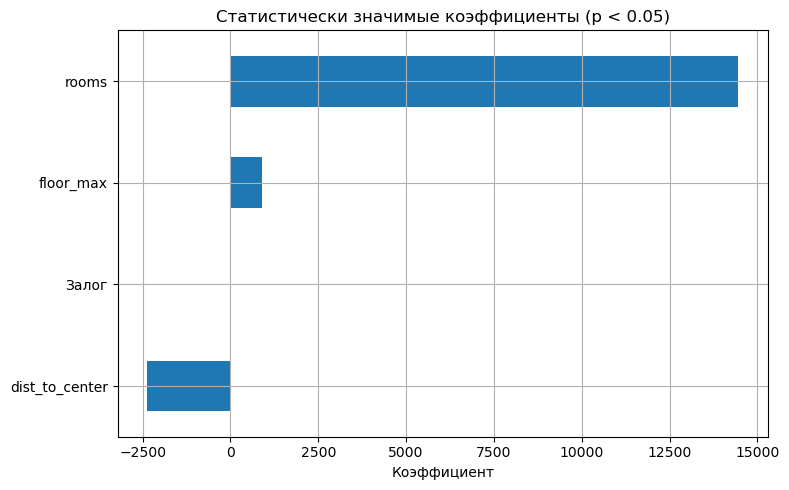

---------------------------
Новомосковский административный округ
             Признак       VIF
0              Залог  6.545862
1              rooms  8.138350
2     dist_to_center  8.993409
3          floor_max  7.510886
4  walk_to_metro_flg  2.182291
p-value=6.523e-105 < 0.05: отвергаем H0 — зависимость есть


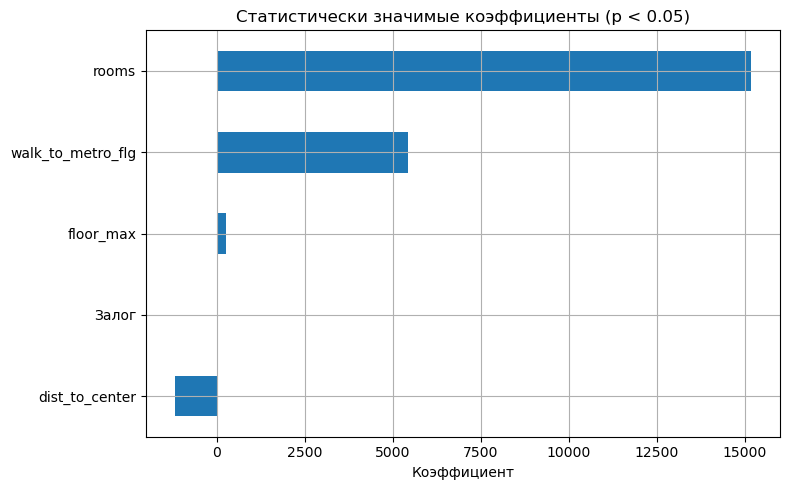

---------------------------
Северо-Западный административный округ
             Признак       VIF
0              Залог  6.238953
1              rooms  7.599907
2     dist_to_center  5.433604
3          floor_max  4.465798
4  walk_to_metro_flg  3.812112
p-value=1.104e-38 < 0.05: отвергаем H0 — зависимость есть


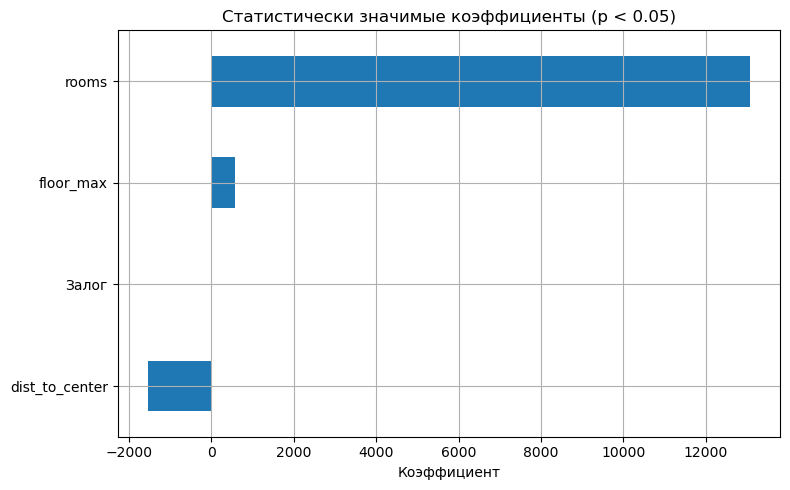

---------------------------
Зеленоградский административный округ
             Признак        VIF
0              Залог   4.558294
1              rooms   7.702978
2     dist_to_center  18.498070
3          floor_max  10.247890
4  walk_to_metro_flg   1.569751
p-value=1.252e-20 < 0.05: отвергаем H0 — зависимость есть


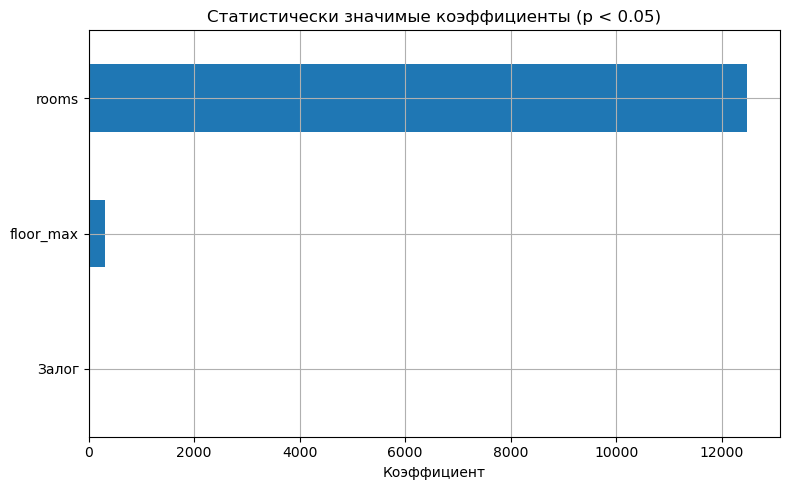

In [ ]:
p_set = {}
for i in region:
  region_model(df_new[df_new['district_name']==i], X, Y, i)

In [ ]:
p_set


{'Восточный административный округ': np.float64(2.4524954277492708e-71),
 'Троицкий административный округ': np.float64(6.318370571702072e-08),
 'Юго-Восточный административный округ': np.float64(7.23344065103474e-97),
 'Южный административный округ': np.float64(1.2893330172934864e-64),
 'Юго-Западный административный округ': np.float64(1.9149158082281007e-53),
 'Северо-Восточный административный округ': np.float64(7.216958329573905e-42),
 'Западный административный округ': np.float64(1.5229868148831712e-56),
 'Центральный административный округ': np.float64(8.062383622587567e-13),
 'Северный административный округ': np.float64(8.580443213220628e-47),
 'Новомосковский административный округ': np.float64(6.522548862312022e-105),
 'Северо-Западный административный округ': np.float64(1.1042849990501449e-38),
 'Зеленоградский административный округ': np.float64(1.2516015187799364e-20)}

In [ ]:
names = list(p_set.keys())
log_p = [-np.log10(v) for v in p_set.values()]

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(names, log_p)
plt.xlabel('-log₁₀(p-value)')
plt.title('Значимость округов по p-значению (меньше — значимее)')
plt.gca().invert_yaxis()  # чтобы значимые сверху
plt.tight_layout()
plt.show()

- Применяя метод оценки значимости коэффициентов в линейной регрессии с помощью t-теста (используя как таргет стоимость аренды, а как независимые признаки - залог, количество комнат, расстояние до центра, этажность дома, флаг наличия метро), виявили, что количество комнат оказывает статистически значимый и практически ощутимый вклад в цену квартиры.
- Выполняя данное действие по округам выявлена проблема мультиколлинеарности, но коэффициент p настолько низок, что мы можем отклонить нулевую гипотезу "Количество комнат не влияет на стоимость аренды квартиры"

## Выбор таргета "цена за м2"

В ходе анализа выше было выявлено, что цена на квартиру зависит от количества комнат в этой квартире.

Однако как мы знаем, чаще всего квартиры с большей комнатностью имеют больший метраж
Поэтому для большей ясности введем новую гипотезу:

***Цена за м^2 не увеличивается при увеличении комнатности квартиры***

Проделаем все те же самые действия

---------------------------
None
             Признак       VIF
0              Залог  5.702381
1              rooms  7.257591
2     dist_to_center  3.218849
3          floor_max  4.181416
4  walk_to_metro_flg  4.547167
p-value=0.000e+00 < 0.05: отвергаем H0 — зависимость есть


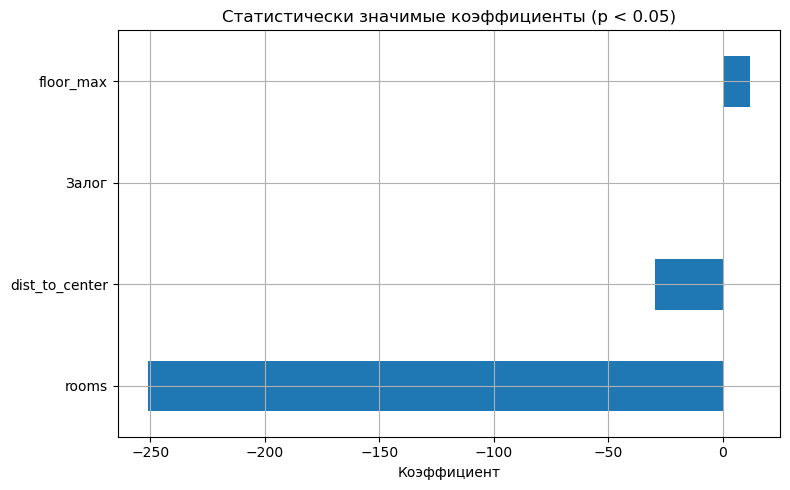

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     6949.
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        05:15:27   Log-Likelihood:            -1.4562e+05
No. Observations:               12851   AIC:                         2.913e+05
Df Residuals:                   12845   BIC:                         2.913e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.506e+04    917.26

In [ ]:
# Ввод нового таргета, и построение функции
Y = ['r_per_meter']
region_model(df_new, X, Y, None)

predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
print(model.summary())

---------------------------
Восточный административный округ
             Признак       VIF
0              Залог  7.403344
1              rooms  7.608352
2     dist_to_center  6.635283
3          floor_max  4.093775
4  walk_to_metro_flg  4.402209
p-value=1.759e-36 < 0.05: отвергаем H0 — зависимость есть


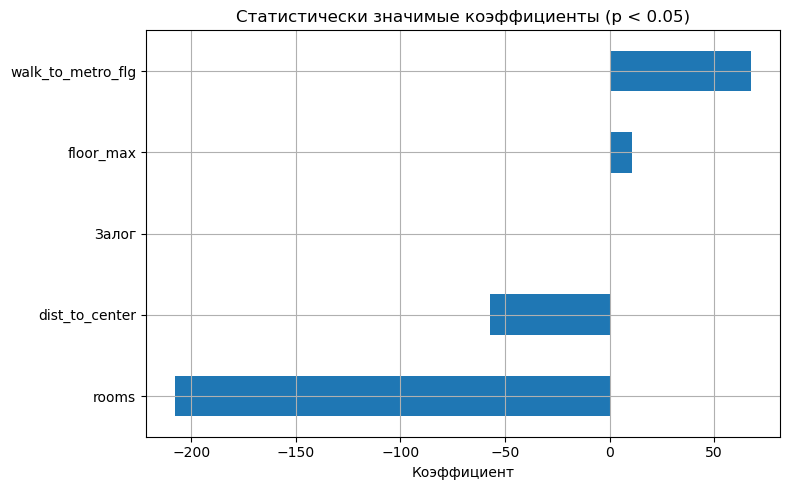

---------------------------
Троицкий административный округ
             Признак        VIF
0              Залог  10.103025
1              rooms   9.427891
2     dist_to_center   7.215988
3          floor_max   4.946037
4  walk_to_metro_flg   1.123067
p-value=3.413e-03 < 0.05: отвергаем H0 — зависимость есть


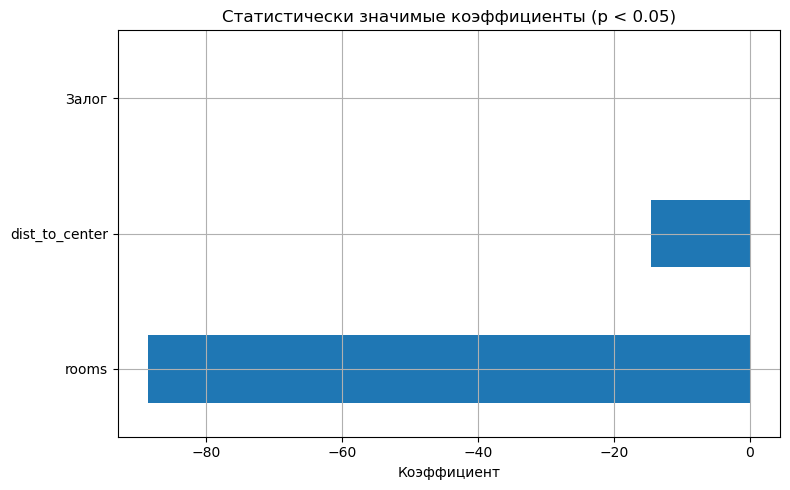

---------------------------
Юго-Восточный административный округ
             Признак       VIF
0              Залог  7.312105
1              rooms  7.167350
2     dist_to_center  4.350291
3          floor_max  5.085460
4  walk_to_metro_flg  7.718075
p-value=3.162e-43 < 0.05: отвергаем H0 — зависимость есть


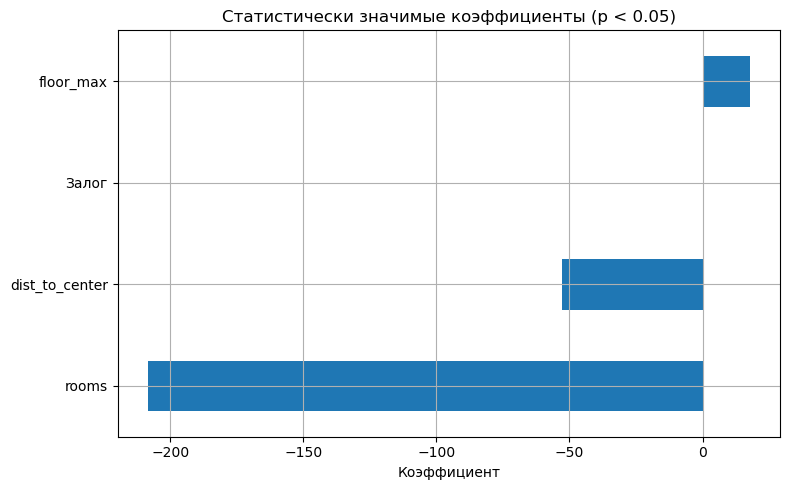

---------------------------
Южный административный округ
             Признак       VIF
0              Залог  5.952369
1              rooms  7.598787
2     dist_to_center  5.558694
3          floor_max  5.400453
4  walk_to_metro_flg  5.329298
p-value=3.706e-32 < 0.05: отвергаем H0 — зависимость есть


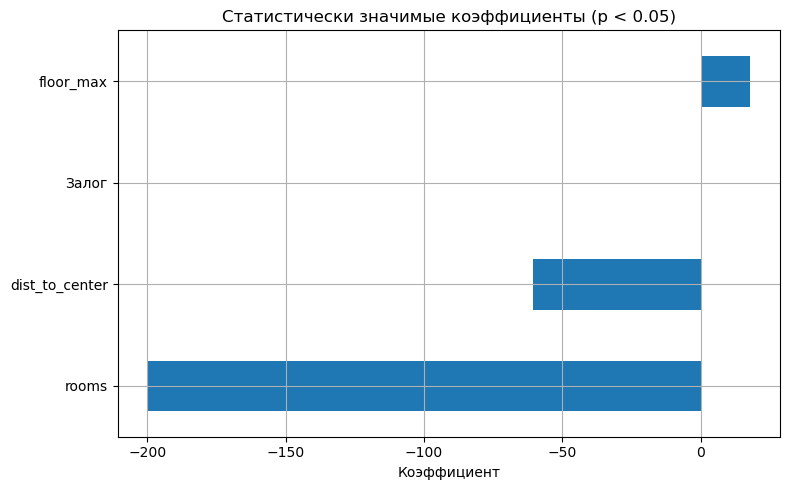

---------------------------
Юго-Западный административный округ
             Признак        VIF
0              Залог   7.013276
1              rooms   8.125672
2     dist_to_center   6.738754
3          floor_max   5.300102
4  walk_to_metro_flg  11.007062
p-value=1.038e-31 < 0.05: отвергаем H0 — зависимость есть


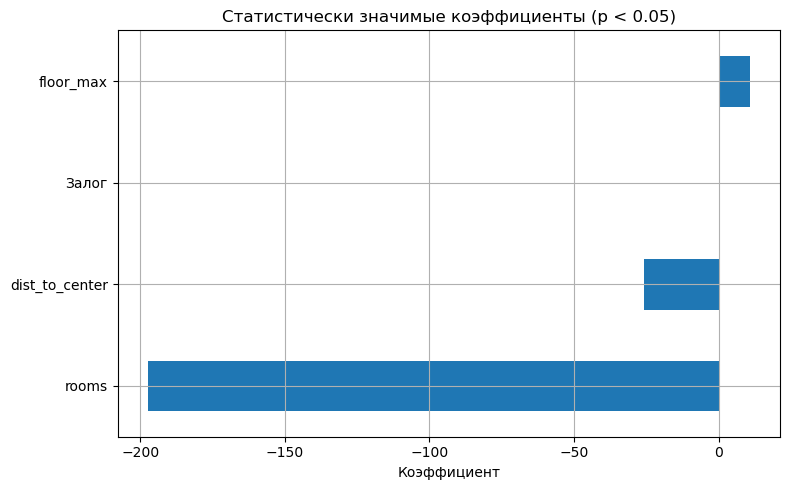

---------------------------
Северо-Восточный административный округ
             Признак       VIF
0              Залог  6.254711
1              rooms  7.360383
2     dist_to_center  4.644958
3          floor_max  4.158374
4  walk_to_metro_flg  4.302898
p-value=5.644e-43 < 0.05: отвергаем H0 — зависимость есть


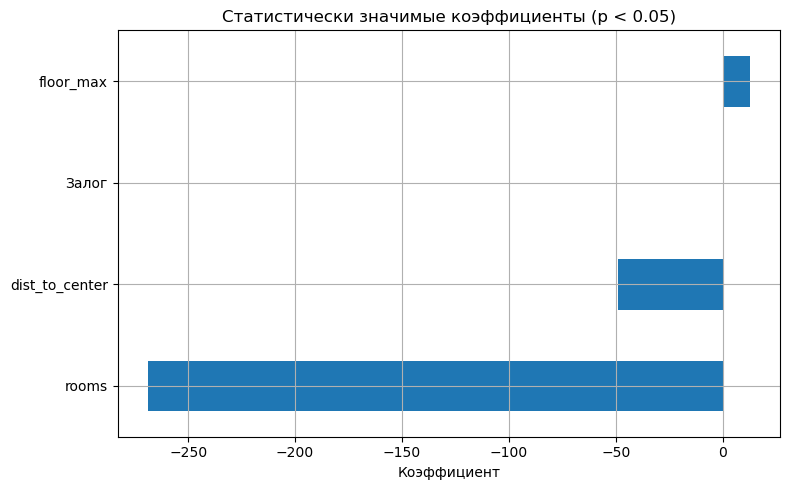

---------------------------
Западный административный округ
             Признак       VIF
0              Залог  6.214061
1              rooms  8.003950
2     dist_to_center  6.882946
3          floor_max  5.744607
4  walk_to_metro_flg  6.880624
p-value=2.119e-52 < 0.05: отвергаем H0 — зависимость есть


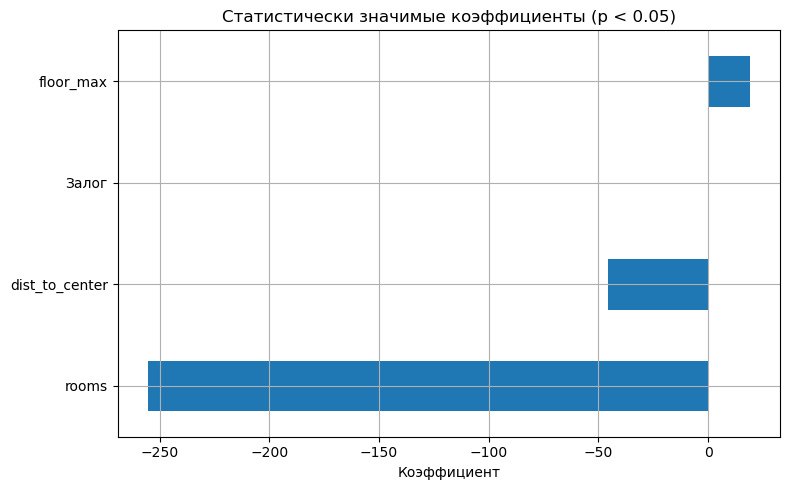

---------------------------
Центральный административный округ
             Признак        VIF
0              Залог   9.162934
1              rooms   9.548723
2     dist_to_center   7.573661
3          floor_max   3.096985
4  walk_to_metro_flg  14.553483
p-value=6.055e-47 < 0.05: отвергаем H0 — зависимость есть


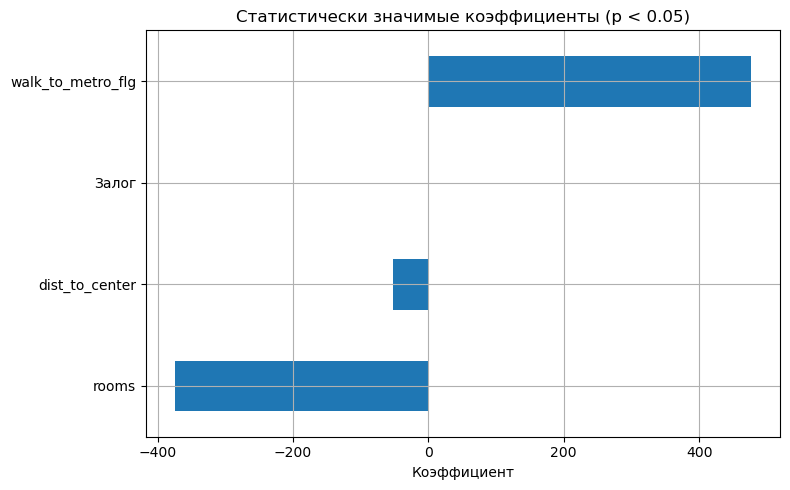

---------------------------
Северный административный округ
             Признак       VIF
0              Залог  5.569371
1              rooms  8.284142
2     dist_to_center  5.052633
3          floor_max  4.406339
4  walk_to_metro_flg  7.174470
p-value=3.413e-37 < 0.05: отвергаем H0 — зависимость есть


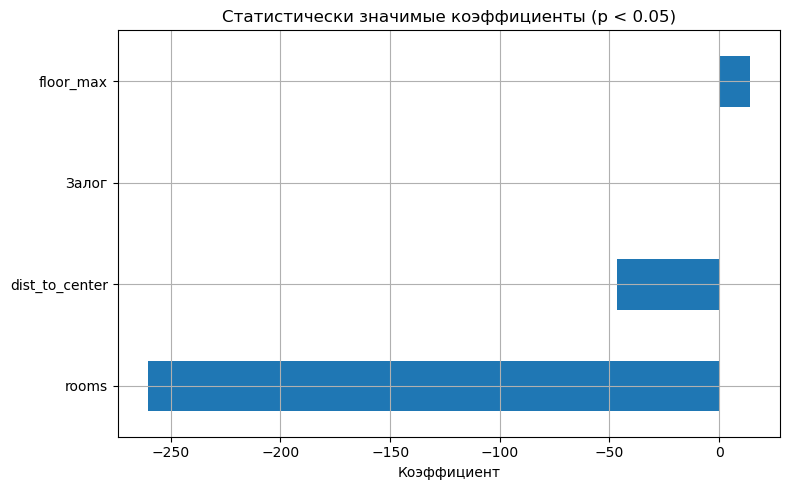

---------------------------
Новомосковский административный округ
             Признак       VIF
0              Залог  6.545862
1              rooms  8.138350
2     dist_to_center  8.993409
3          floor_max  7.510886
4  walk_to_metro_flg  2.182291
p-value=6.119e-13 < 0.05: отвергаем H0 — зависимость есть


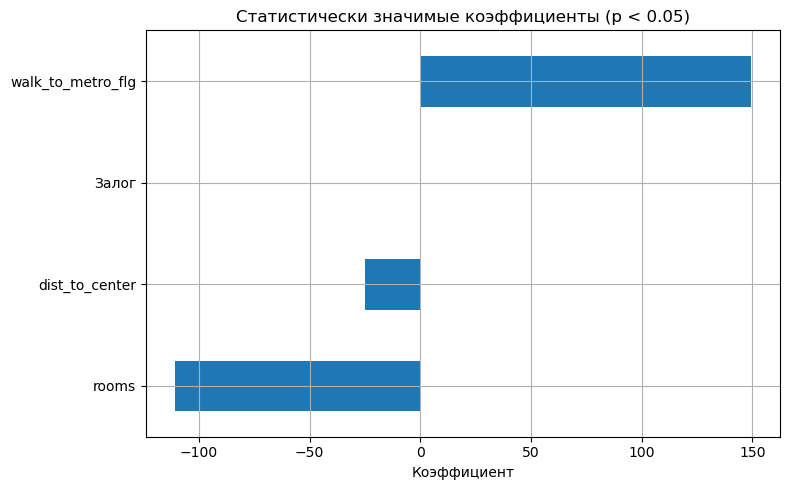

---------------------------
Северо-Западный административный округ
             Признак       VIF
0              Залог  6.238953
1              rooms  7.599907
2     dist_to_center  5.433604
3          floor_max  4.465798
4  walk_to_metro_flg  3.812112
p-value=2.430e-42 < 0.05: отвергаем H0 — зависимость есть


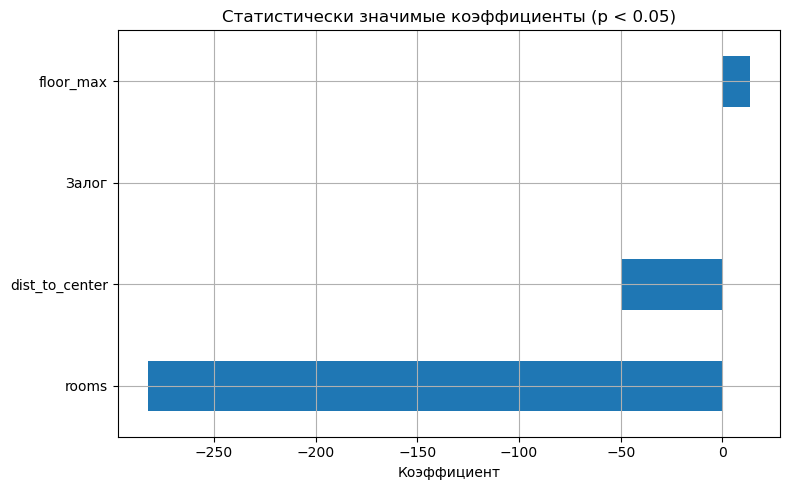

---------------------------
Зеленоградский административный округ
             Признак        VIF
0              Залог   4.558294
1              rooms   7.702978
2     dist_to_center  18.498070
3          floor_max  10.247890
4  walk_to_metro_flg   1.569751
p-value=1.688e-04 < 0.05: отвергаем H0 — зависимость есть


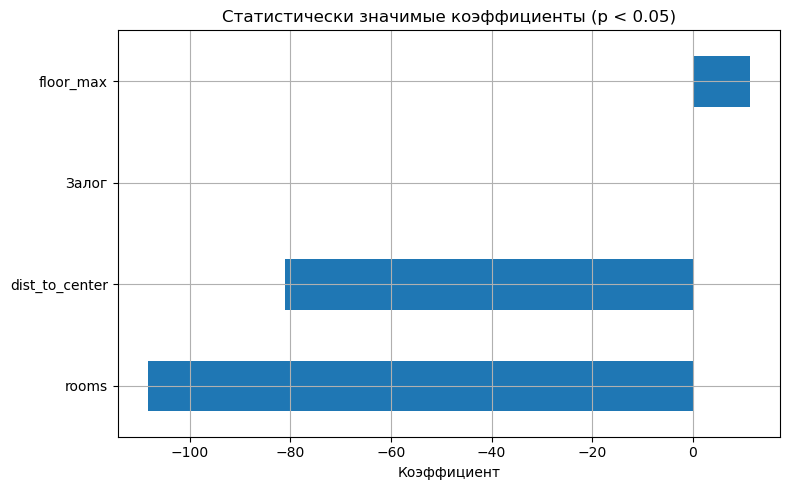

In [ ]:
p_set = {}
for i in region:
  region_model(df_new[df_new['district_name']==i], X, Y, i)

In [ ]:
p_set

{'Восточный административный округ': np.float64(1.7586477886071008e-36),
 'Троицкий административный округ': np.float64(0.0034130310252536125),
 'Юго-Восточный административный округ': np.float64(3.161594535134052e-43),
 'Южный административный округ': np.float64(3.706469912223316e-32),
 'Юго-Западный административный округ': np.float64(1.0377814323332968e-31),
 'Северо-Восточный административный округ': np.float64(5.6439843329045805e-43),
 'Западный административный округ': np.float64(2.119189894198882e-52),
 'Центральный административный округ': np.float64(6.054603172405187e-47),
 'Северный административный округ': np.float64(3.413391524507961e-37),
 'Новомосковский административный округ': np.float64(6.118662776248847e-13),
 'Северо-Западный административный округ': np.float64(2.4298611915326434e-42),
 'Зеленоградский административный округ': np.float64(0.0001687513706678847),
 None: np.float64(0.0)}

Ситуация соответствует предыдущему пункту, но коэффициент для комнатности принимает отрицательное значение

## Вывод

 - В ходе анализа ввели нулевую гипотезу ***Количество комнат не влияет на стоимость квартиры***, которую отклонили и выявили, что при увеличении комнатности растет общая цена аренды квартиры.
 - Также была введена нулевая гипотеза ***Цена за м^2 не увеличивается при увеличении комнатности квартиры***, которую также отклонили и выявили, что при увеличении комнатности цена за м^2 становится ниже.

# **Гипотеза H₀.4**

H0: Различия в цене за м2 не зависят от типа ремонта

Н4: Тип ремонта влияет на цену за м2

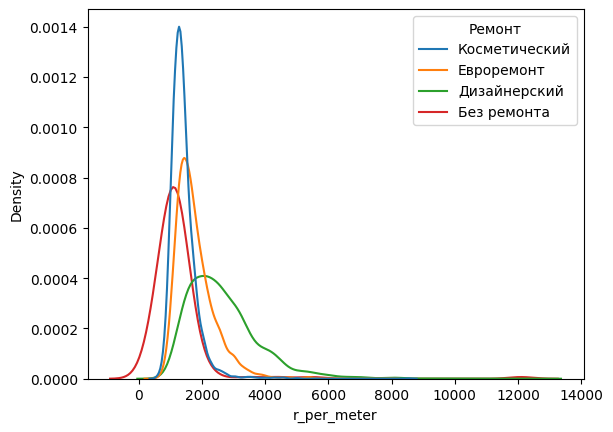

In [ ]:
import seaborn as sns
sns.kdeplot(x='r_per_meter', data=df, hue='Ремонт', common_norm=False);

In [ ]:
from scipy.stats import kstest
for each in df[~df['Ремонт'].isna()]['Ремонт'].unique():
    print(kstest(df[df['Ремонт']==each]['r_per_meter'],'norm')) #распределения не соответствуют нормальным

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(584.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(510.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(612.0), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(250.0), statistic_sign=np.int8(-1))


In [ ]:
from scipy.stats import kruskal

# Подготовка групп
groups = [group['r_per_meter'].values for name, group in df.groupby('Ремонт')]

# Проведение теста
h_stat, p_value = kruskal(*groups)
print(f"H-статистика: {h_stat:.3f}")
print(f"P-значение: {p_value:.3e}")

#Можно сделать вывод о том, что, согласно критерию Краскела–Уоллиса (который мы применили из-за ненормальности респределения) есть статистически значимые различия
# p <= 0 следовательно H0 об отсутствии отличй мы отвергаем

H-статистика: 4472.493
P-значение: 0.000e+00


##**Вывод**

Согласно критерию Краскела–Уоллиса (который мы применили из-за ненормальности респределения) есть статистически значимые различия p <= 0 следовательно H0 об отсутствии отличй мы отвергаем

# **Гипотеза H₀.5**

Н0: Цена квадратного метра НЕ зависит от общей площади

Н5: Цена квадратного метра зависит от общей площади

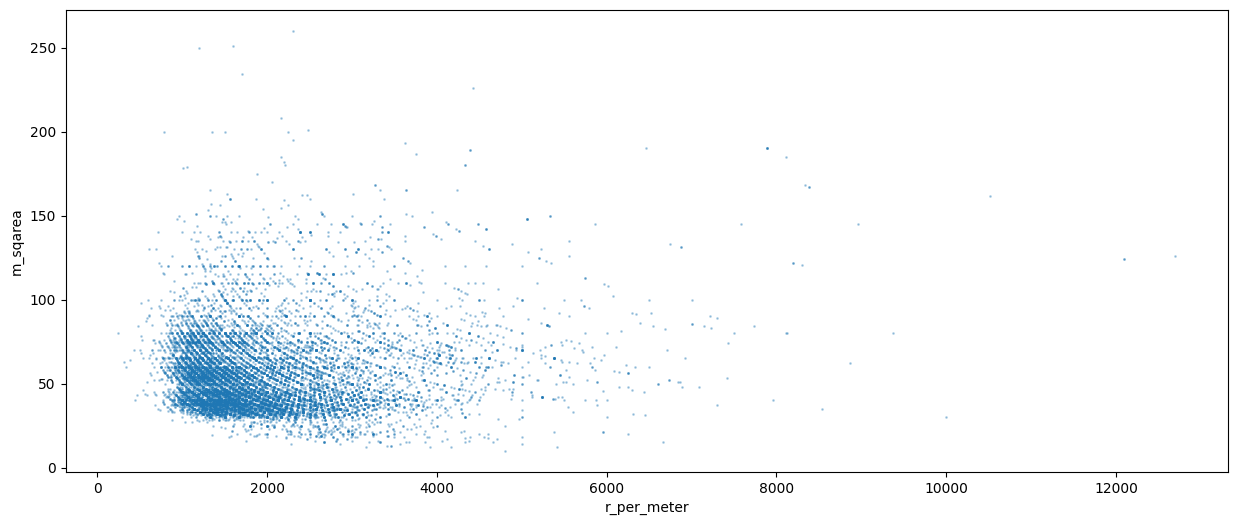

In [ ]:
df[['r_per_meter','m_sqarea']].plot(x='r_per_meter',y='m_sqarea',kind='scatter',figsize=(15,6),alpha=.3,s=1);

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Спирмен
spearman_corr, spearman_p = spearmanr(df['m_sqarea'], df['r_per_meter'])
print(f"Спирмен: corr = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")
#Так как коэф. около нуля - делаем вывод о том, что зависимости нет => скидку за покупку большого кол-ва м2 не выдают

Спирмен: corr = -0.058, p-value = 1.211e-13


## **Вывод**

Так как коэф. около нуля - делаем вывод о том, что зависимости нет => скидку за покупку большого кол-ва м2 не выдают

#**Гипотеза H₀.6**

Н0: Взаимосвязи между удаленностью от центра и стоимость квадратного метра нет

Н1: Удаленность от центра влияет на стоимость квадратного метра

In [ ]:
## Проверяем наличие взаимосвязи между удаленностью от центра и стоимость квадратного метра
df = df[df['r_per_meter']<=8000]

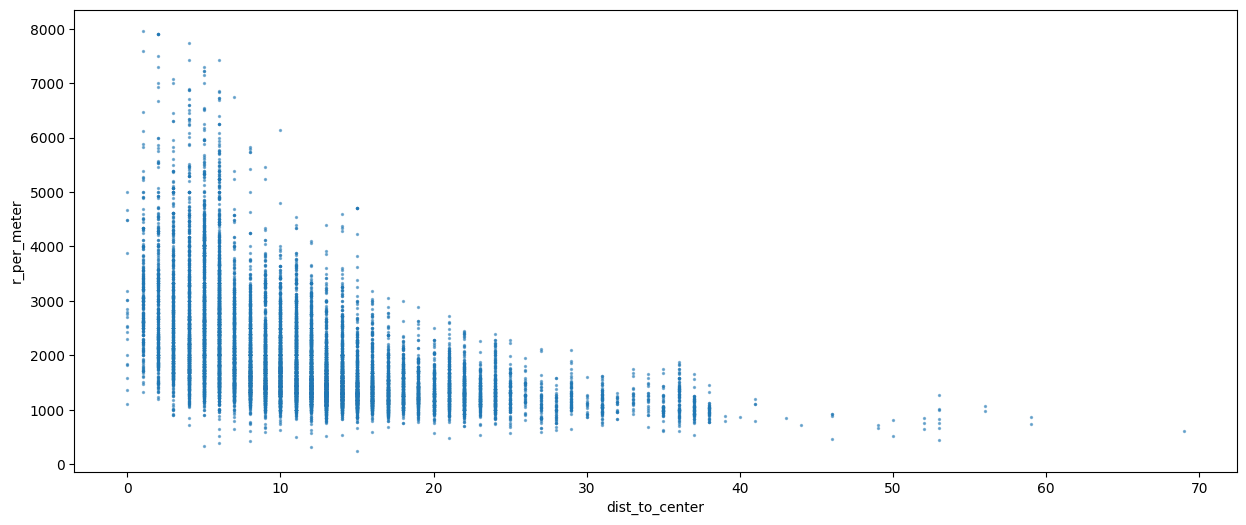

In [ ]:
df[['dist_to_center','r_per_meter']].plot(x='dist_to_center',y='r_per_meter',kind='scatter',figsize=(15,6),alpha=0.5,s=2);

<Axes: >

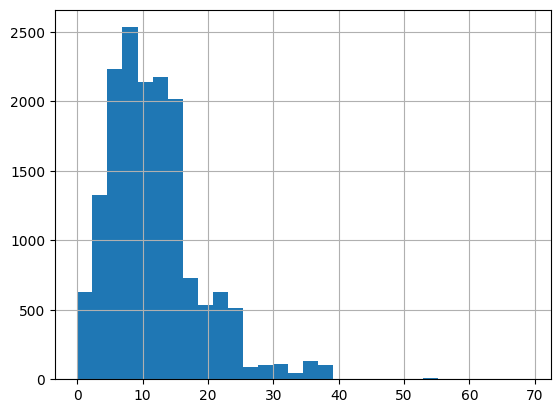

In [ ]:
df['dist_to_center'].hist(bins=30)

In [ ]:
spearman_corr, spearman_p = spearmanr(df['dist_to_center'], df['r_per_meter'])
print(f"Спирмен: corr = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")
#Исходя из результатов видим статистически значимый результат (p=0) и сильую обратную корреляцию -0.61
#Можем сделать вывод, что при повышении показателя удаленности от центра понижается стоимость.

Спирмен: corr = -0.611, p-value = 0.000e+00


##**Вывод**

Исходя из результатов видим статистически значимый результат (p=0) и сильую обратную корреляцию -0.61. При повышении показателя удаленности от центра понижается стоимость. Нулевую гипотезу отвергаем.

# **Гипотеза H₀.7**

Н0: Количество детской инфраструктуры НЕ влияет на цены двух- и трехкомнатных квартир.

Н7: Количество детской инфраструктуры влияет на цены двух- и трехкомнатных квартир.

Выделяем сабсет и подсчитываем детскую инфраструктуру (детсады и школы)

In [ ]:
df_subset = df[df['rooms'].isin([2, 3])]
df_subset['kids_infrastructure'] = (df_subset['school_1000m'] + df_subset['kindergarten_500m'])

<ipython-input-28-0a42a0fa4b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['kids_infrastructure'] = (df_subset['school_1000m'] + df_subset['kindergarten_500m'])


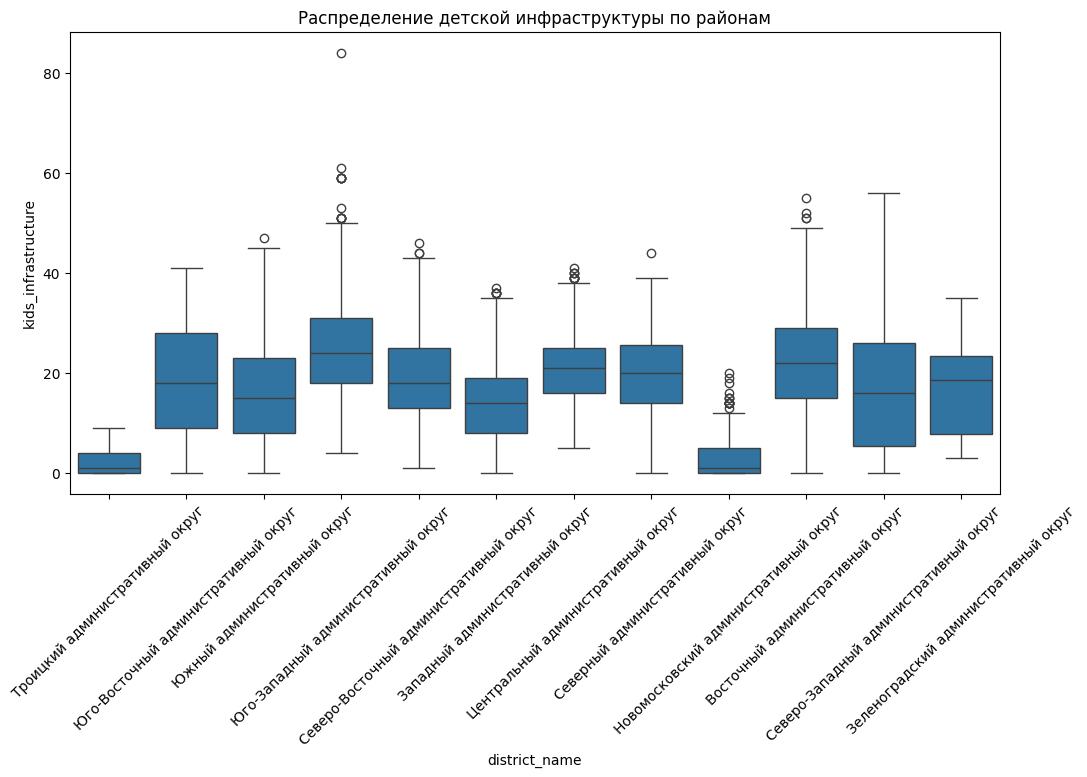

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_subset['district_name'], y=df_subset['kids_infrastructure'])
plt.title("Распределение детской инфраструктуры по районам")
plt.xticks(rotation=45)
plt.show()

Уже по графику видно несостыковочки :)

In [ ]:
infrastructure_median = df_subset['kids_infrastructure'].median()
df_subset['infrastructure_level'] = df_subset['kids_infrastructure'].apply(lambda x: 'high' if x > infrastructure_median else 'low')

# Проверим среднюю цену в двух группах
grouped = df_subset.groupby('infrastructure_level')['price'].mean()
print(grouped)

# Статистический тест (t-test)
from scipy.stats import ttest_ind
high_prices = df_subset[df_subset['infrastructure_level'] == 'high']['price']
low_prices = df_subset[df_subset['infrastructure_level'] == 'low']['price']
t_stat, p_value = ttest_ind(high_prices, low_prices, equal_var=False)
print(f't-statistic: {t_stat:.3f}, p-value: {p_value:.3f}')

infrastructure_level
high    91615.090396
low     98114.266018
Name: price, dtype: float64
t-statistic: -7.253, p-value: 0.000


<ipython-input-29-931a08afa363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['infrastructure_level'] = df_subset['kids_infrastructure'].apply(lambda x: 'high' if x > infrastructure_median else 'low')


Получается, большое количество детской инфраструктуры снижает стоимость 2- и 3-комнатных квартир. Но само по себе влияние на цену небольшое

##**Вывод**

Большое количество детской инфраструктуры снижает стоимость 2- и 3-комнатных квартир.